In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Tata Motors on NSE
ticker = "TATAMOTORS.NS"

# Fetch historical stock data
data = yf.download(ticker, start="1992-01-02", end="2025-02-22")

if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)

# Save to CSV
data.to_csv("tata.csv")

print("Data saved as tata.csv")

# Display first few rows
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data saved as tata.csv
Price           Close       High        Low       Open  Volume
Date                                                          
1992-01-02  24.610010  24.932412  24.287608  24.932412       0
1992-01-03  25.147343  25.577212  24.932411  24.932411       0
1992-01-06  24.932409  25.684679  24.824942  25.684679       0
1992-01-07  24.717474  24.932409  24.287604  24.717474       0
1992-01-08  24.824947  25.039880  24.395078  24.502545       0


In [ ]:
import pandas as pd

# Load the data while skipping the first two rows (as they contain headers)
df = pd.read_csv("tata.csv", skiprows=2)

# Rename columns properly
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Convert Date column to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"], format='mixed', dayfirst=True, errors='coerce')

# Drop any rows where the Date is not parsed correctly
df.dropna(subset=["Date"], inplace=True)

# Set Date as the index
df.set_index("Date", inplace=True)

# Convert numerical columns to float
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)


# Show first few rows
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
1992-01-06,24.932409,25.684679,24.824942,25.684679,0.0
1992-01-07,24.717474,24.932409,24.287604,24.717474,0.0
1992-01-08,24.824947,25.039880,24.395078,24.502545,0.0
1992-01-09,24.610010,24.824945,24.502543,24.824945,0.0
1992-01-10,24.610010,24.610010,24.610010,24.610010,0.0


In [ ]:
print("Dataframe Shape:", df.shape)
print("Null Values:", df.isnull().values.any())

Dataframe Shape: (8363, 5)
Null Values: False


In [ ]:
# Get the total number of rows
total_rows = df.shape[0]
print("Total number of rows:", total_rows)

# Filter and display rows where Volume is 0
zero_volume_rows = df[df['Volume'] == 0]
print("Number of rows where Volume is 0:", zero_volume_rows.shape[0])

# Display the first few rows where Volume is 0
print("Initial rows where Volume is 0:")
display(zero_volume_rows.head())  # Use in Jupyter Notebook

# OR if not using Jupyter:
print(zero_volume_rows.head())  # Prints in standard Python

Total number of rows: 8363
Number of rows where Volume is 0: 1051
Initial rows where Volume is 0:


,Close,High,Low,Open,Volume
Date,,,,,
1992-01-06,24.932409,25.684679,24.824942,25.684679,0.0
1992-01-07,24.717474,24.932409,24.287604,24.717474,0.0
1992-01-08,24.824947,25.039880,24.395078,24.502545,0.0
1992-01-09,24.610010,24.824945,24.502543,24.824945,0.0
1992-01-10,24.610010,24.610010,24.610010,24.610010,0.0


                Close       High        Low       Open  Volume
Date                                                          
1992-01-06  24.932409  25.684679  24.824942  25.684679     0.0
1992-01-07  24.717474  24.932409  24.287604  24.717474     0.0
1992-01-08  24.824947  25.039880  24.395078  24.502545     0.0
1992-01-09  24.610010  24.824945  24.502543  24.824945     0.0
1992-01-10  24.610010  24.610010  24.610010  24.610010     0.0


In [ ]:
duplicate_rows = data.duplicated()
print(duplicate_rows.sum())
data.drop_duplicates(inplace=True)

126


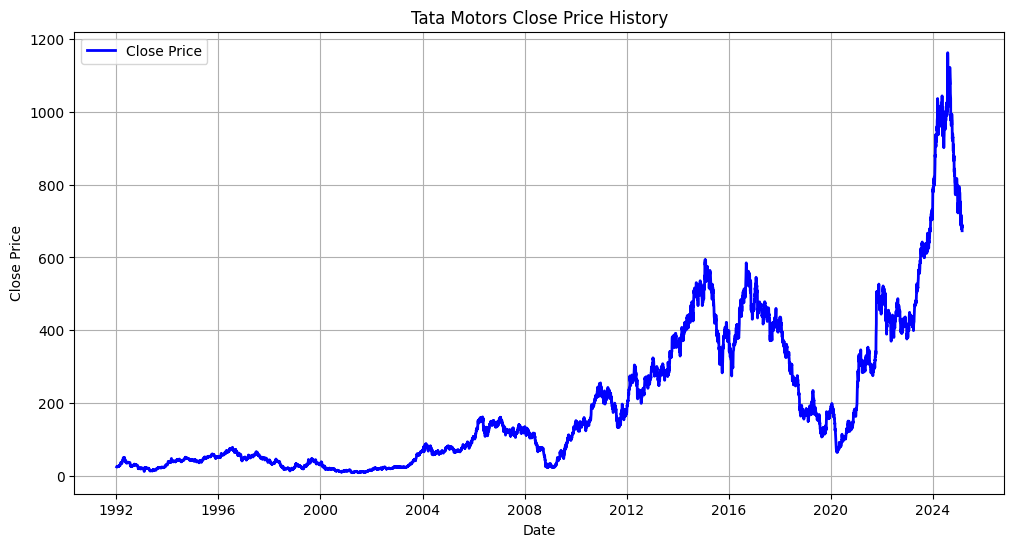

In [ ]:
import matplotlib.pyplot as plt

# Ensure Date is the index
df_out = df.copy()  # If df_out is not defined yet, copy df to avoid errors

# Plot the Close price history
plt.figure(figsize=(12,6))
plt.plot(df_out.index, df_out["Close"], label="Close Price", color='blue', linewidth=2)

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Tata Motors Close Price History")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

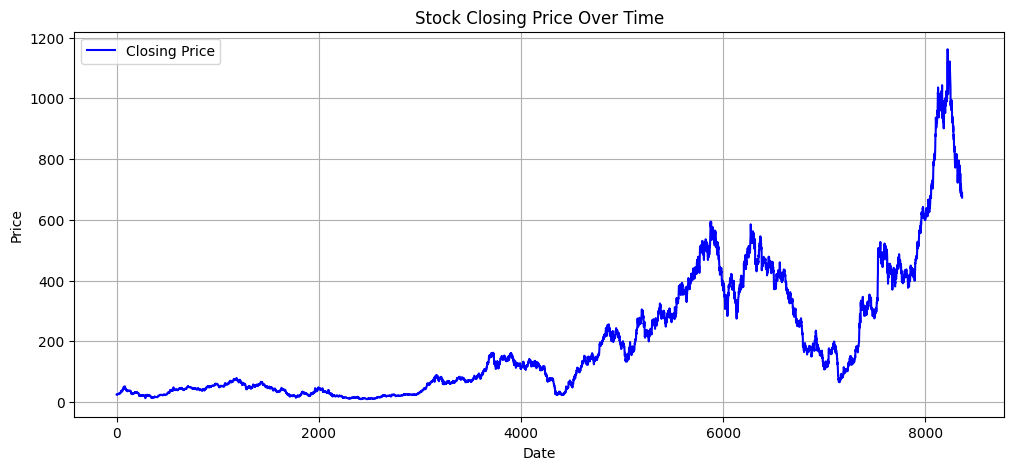

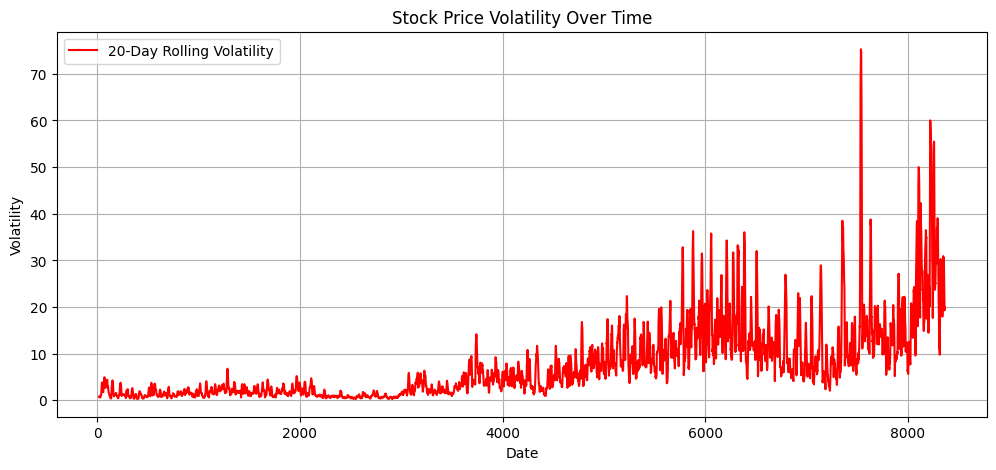

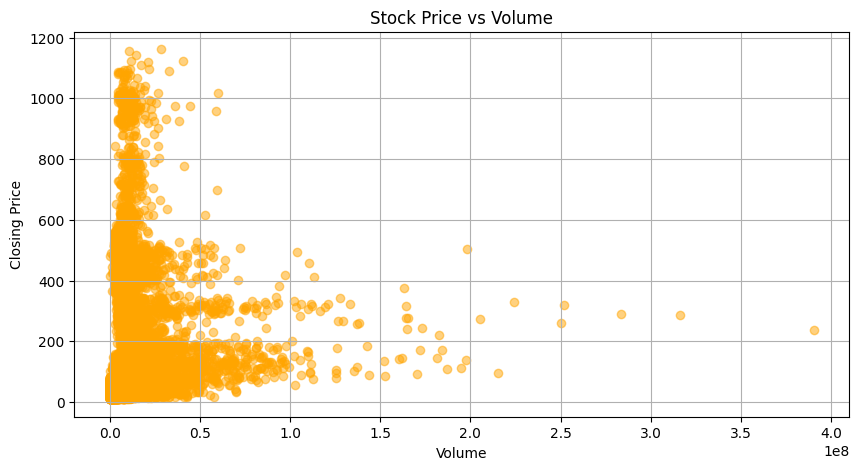

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
file_path = 'tata.csv'  # Update this if needed
df = pd.read_csv(file_path, na_values=['null'])

# Convert numeric columns
df = df.apply(pd.to_numeric, errors='coerce')

# 1. Closing Price Trend
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# 2. Stock Volatility (Rolling Std Dev)
df['volatility'] = df['Close'].rolling(window=20).std()
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['volatility'], label='20-Day Rolling Volatility', color='red')
plt.title('Stock Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

# 5. Volume vs Price Movement (Scatter Plot)
plt.figure(figsize=(10, 5))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='orange')
plt.title('Stock Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
file_path = "tata.csv"  # Update with the actual CSV file path
df = pd.read_csv(file_path)

df.columns = df.columns.str.lower()

gain = df['close'].diff()
gain[gain < 0] = 0  # Keep only positive gains
loss = -df['close'].diff()
loss[loss < 0] = 0  # Keep only positive losses

# Compute average gain and loss
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# Compute Relative Strength (RS)
rs = avg_gain / avg_loss

# Compute RSI
df['rsi'] = 100 - (100 / (1 + rs))
df['moving_average_5'] = df['close'].rolling(window=5).mean()
df['moving_average_10'] = df['close'].rolling(window=10).mean()
# Remove rows where volume is zero
df_filtered = df[df['volume'] != 0]

# Save the cleaned dataset
df_filtered.to_csv("tata_volrem.csv", index=False)

print("Rows with volume zero removed. Cleaned data saved as 'cleaned_data.csv'.")

Rows with volume zero removed. Cleaned data saved as 'cleaned_data.csv'.


#Stock Price Prediction

## A1

Train R² Score: 1.0000
Test R² Score: 0.9998
Train Accuracy (±2% threshold): 0.9935
Test Accuracy (±2% threshold): 0.9023


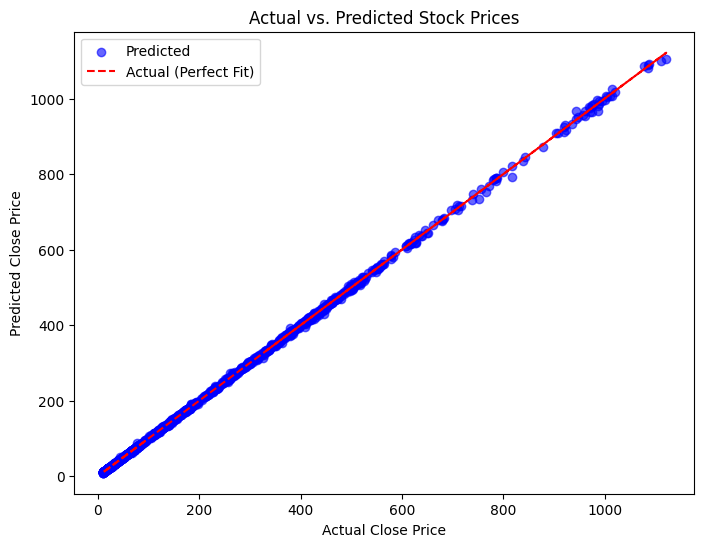

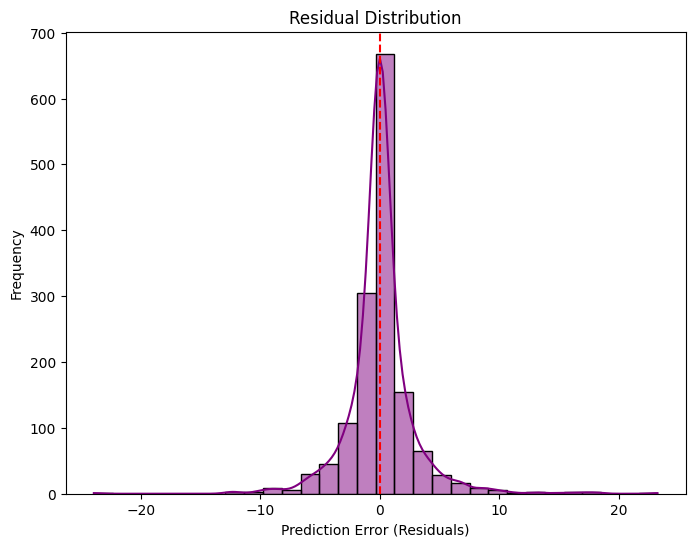

<ipython-input-9-f029230f909b>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette="viridis")


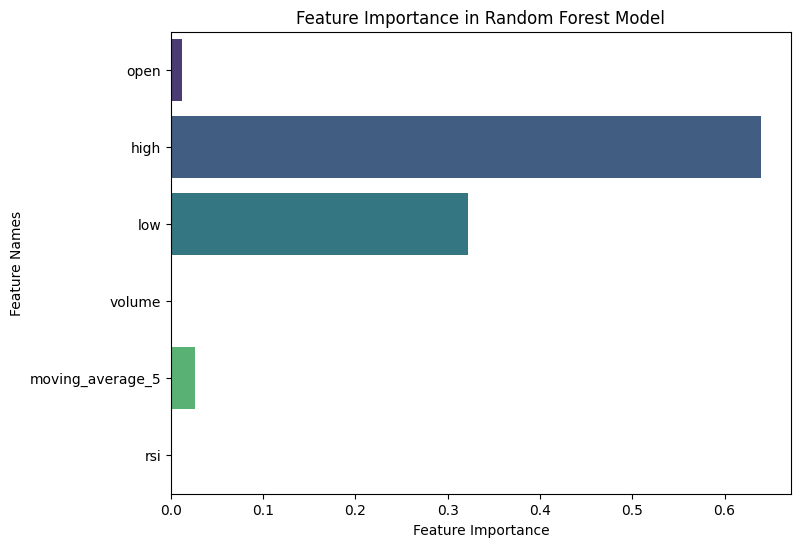

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load Data
df = pd.read_csv("tata_volrem.csv")

# Select Features (X) and Target Variable (y)
X = df[['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi']]
y = df['close']  # Predicting the closing price

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on Train & Test Data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² Score (Normalized Accuracy)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Define Custom Accuracy (Within 2% of True Value)
def custom_accuracy(y_true, y_pred, tolerance=0.02):
    return np.mean(np.abs((y_true - y_pred) / y_true) <= tolerance)

train_acc = custom_accuracy(y_train, y_train_pred)
test_acc = custom_accuracy(y_test, y_test_pred)

print(f"Train Accuracy (±2% threshold): {train_acc:.4f}")
print(f"Test Accuracy (±2% threshold): {test_acc:.4f}")

# 📈 1. Actual vs. Predicted Prices (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue", label="Predicted")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Actual (Perfect Fit)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()

# 📊 2. Residual Plot (Error Analysis)
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# 📉 3. Feature Importance Plot
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest Model")
plt.show()

Train R² Score: 1.0000
Test R² Score: 0.9997
Train Accuracy (±2% threshold): 0.9850
Test Accuracy (±2% threshold): 0.8278


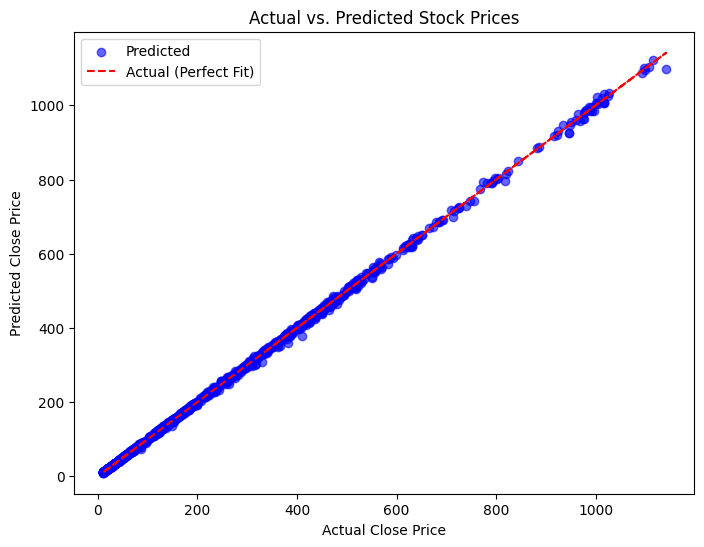

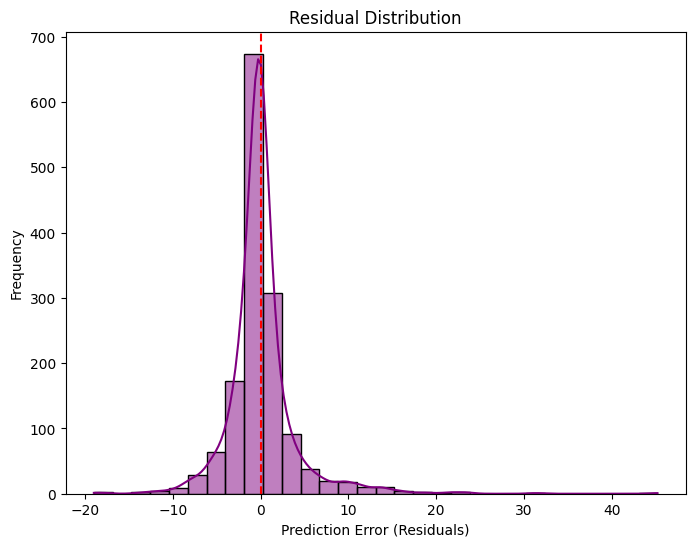

<ipython-input-10-aa8af44b1d89>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette="viridis")


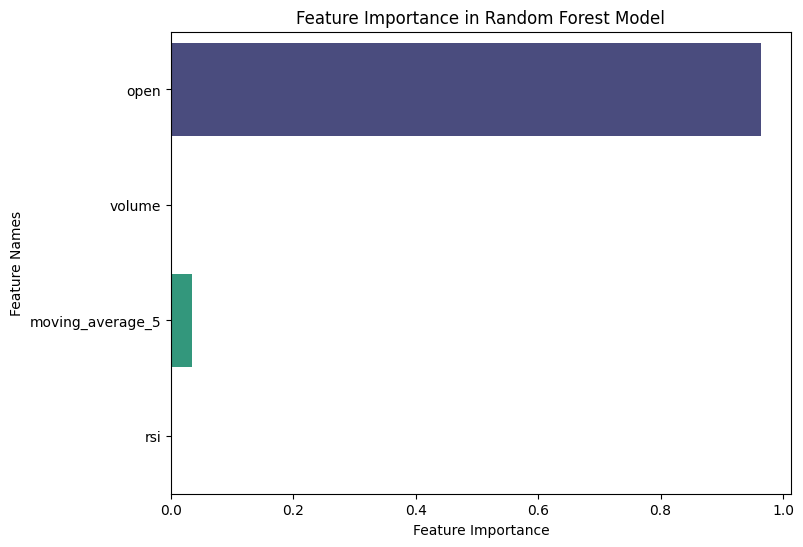

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load Data
df = pd.read_csv("tata_volrem.csv")

# Select Features (X) and Target Variable (y)
X = df[['open','volume', 'moving_average_5', 'rsi']]
y = df['high']  # Predicting the closing price

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on Train & Test Data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² Score (Normalized Accuracy)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Define Custom Accuracy (Within 2% of True Value)
def custom_accuracy(y_true, y_pred, tolerance=0.02):
    return np.mean(np.abs((y_true - y_pred) / y_true) <= tolerance)

train_acc = custom_accuracy(y_train, y_train_pred)
test_acc = custom_accuracy(y_test, y_test_pred)

print(f"Train Accuracy (±2% threshold): {train_acc:.4f}")
print(f"Test Accuracy (±2% threshold): {test_acc:.4f}")

# 📈 1. Actual vs. Predicted Prices (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue", label="Predicted")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Actual (Perfect Fit)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()

# 📊 2. Residual Plot (Error Analysis)
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# 📉 3. Feature Importance Plot
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 📌 Load Data
df = pd.read_csv("tata_volrem.csv")

# 📌 Select Features (X) and Target Variable (y)
X = df[['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi']]
y = df['close']  # Predicting the closing price

# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 Save Model to Pickle File
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as 'random_forest_model.pkl'")

# 📌 Load Model from Pickle File
with open("random_forest_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# 📌 Predict on Test Data
y_pred = loaded_model.predict(X_test)

# 📌 Evaluate Model
r2 = r2_score(y_test, y_pred)
print(f"📈 Loaded Model R² Score: {r2:.4f}")


✅ Model saved as 'random_forest_model.pkl'
📈 Loaded Model R² Score: 0.9998


## A2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 📌 Load Data
df = pd.read_csv("tata_volrem.csv")

# 📌 Select Features (X) and Target Variable (y)
X = df[['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi']]
y = df['close']

# 📌 Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Apply PCA for Dimensionality Reduction
pca = PCA(n_components=4)  # Reduce to 4 principal components
X_pca = pca.fit_transform(X_scaled)

# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 📌 Base Model (Before Hyperparameter Tuning)
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

# 📌 Predictions (Before Tuning)
y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

# 📌 Compute Metrics (Before Tuning)
train_mae_before = mean_absolute_error(y_train, y_train_pred)
test_mae_before = mean_absolute_error(y_test, y_test_pred)
train_r2_before = r2_score(y_train, y_train_pred)
test_r2_before = r2_score(y_test, y_test_pred)

# 📌 Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 📌 Best Parameters
best_params = grid_search.best_params_
print(f"🔥 Best Parameters: {best_params}")

# 📌 Train Optimized Model with Best Parameters
optimized_model = RandomForestRegressor(**best_params, random_state=42)
optimized_model.fit(X_train, y_train)

# 📌 Predictions (After Tuning)
y_train_pred_opt = optimized_model.predict(X_train)
y_test_pred_opt = optimized_model.predict(X_test)

# 📌 Compute Metrics (After Tuning)
train_mae_after = mean_absolute_error(y_train, y_train_pred_opt)
test_mae_after = mean_absolute_error(y_test, y_test_pred_opt)
train_r2_after = r2_score(y_train, y_train_pred_opt)
test_r2_after = r2_score(y_test, y_test_pred_opt)

# 📌 Compare Results
results_df = pd.DataFrame({
    "Metric": ["Train MAE", "Test MAE", "Train R² Score", "Test R² Score"],
    "Before Tuning": [train_mae_before, test_mae_before, train_r2_before, test_r2_before],
    "After Tuning": [train_mae_after, test_mae_after, train_r2_after, test_r2_after]
})

print("\n📊 Model Performance Before & After Optimization:\n")
print(results_df)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
🔥 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

📊 Model Performance Before & After Optimization:

           Metric  Before Tuning  After Tuning
0       Train MAE       0.908476      1.450893
1        Test MAE       2.308973      2.350104
2  Train R² Score       0.999950      0.999899
3   Test R² Score       0.999715      0.999715


In [ ]:
import joblib

# 📌 Save the optimized model to a file
joblib.dump(optimized_model, 'optimized_rf_model.pkl')
print("✅ Optimized model saved as 'optimized_rf_model.pkl'")

# (Optional) Save the scaler and PCA model too
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
print("✅ Scaler and PCA models saved as 'scaler.pkl' and 'pca.pkl'")

✅ Optimized model saved as 'optimized_rf_model.pkl'
✅ Scaler and PCA models saved as 'scaler.pkl' and 'pca.pkl'


## Mini

In [ ]:
# prompt: give an ensemble code for the same as above

import pandas as pd
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your existing code) ...

# 📌 Ensemble Model (Voting Regressor with Random Forest and SVR)
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf1_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')  # You can adjust the kernel as needed

ensemble_model = VotingRegressor([('rf', rf_model), ('svr', svr_model), ('rf1', rf1_model)])
ensemble_model.fit(X_train, y_train)

# 📌 Predictions (Ensemble Model)
y_train_pred_ens = ensemble_model.predict(X_train)
y_test_pred_ens = ensemble_model.predict(X_test)

# 📌 Compute Metrics (Ensemble Model)
train_mae_ens = mean_absolute_error(y_train, y_train_pred_ens)
test_mae_ens = mean_absolute_error(y_test, y_test_pred_ens)
train_r2_ens = r2_score(y_train, y_train_pred_ens)
test_r2_ens = r2_score(y_test, y_test_pred_ens)

# 📌 Compare Results (Ensemble vs. Optimized Models)
results_df = pd.DataFrame({
    "Metric": ["Train MAE", "Test MAE", "Train R² Score", "Test R² Score"],
    "Optimized Random Forest": [train_mae_after, test_mae_after, train_r2_after, test_r2_after],
    "Ensemble Model (RF + SVR)": [train_mae_ens, test_mae_ens, train_r2_ens, test_r2_ens]
})

print("\n📊 Model Performance Comparison (Optimized RF vs. Ensemble):\n")
results_df


📊 Model Performance Comparison (Optimized RF vs. Ensemble):



,Metric,Optimized Random Forest,Ensemble Model (RF + SVR)
0,Train MAE,1.450847,9.285227
1,Test MAE,2.350534,10.307686
2,Train R² Score,0.999899,0.978405
3,Test R² Score,0.999715,0.977580


In [ ]:
# prompt: give an ensemble code for the same as above

import pandas as pd
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your existing code) ...

# 📌 Ensemble Model (Voting Regressor with Random Forest and SVR)
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf1_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')  # You can adjust the kernel as needed

ensemble_model = VotingRegressor([('rf', rf_model), ('svr', svr_model), ('rf1', rf1_model)])
ensemble_model.fit(X_train, y_train)

# 📌 Predictions (Ensemble Model)
y_train_pred_ens = ensemble_model.predict(X_train)
y_test_pred_ens = ensemble_model.predict(X_test)

# 📌 Compute Metrics (Ensemble Model)
train_mae_ens = mean_absolute_error(y_train, y_train_pred_ens)
test_mae_ens = mean_absolute_error(y_test, y_test_pred_ens)
train_r2_ens = r2_score(y_train, y_train_pred_ens)
test_r2_ens = r2_score(y_test, y_test_pred_ens)

# 📌 Compare Results (Ensemble vs. Optimized Models)
results_df = pd.DataFrame({
    "Metric": ["Train MAE", "Test MAE", "Train R² Score", "Test R² Score"],
    "Optimized Random Forest": [train_mae_after, test_mae_after, train_r2_after, test_r2_after],
    "Ensemble Model (RF + SVR)": [train_mae_ens, test_mae_ens, train_r2_ens, test_r2_ens]
})

def custom_accuracy(y_true, y_pred, tolerance=0.02):
    return np.mean(np.abs((y_true - y_pred) / y_true) <= tolerance)

train_acc = custom_accuracy(y_train, y_train_pred_ens)
test_acc = custom_accuracy(y_test, y_test_pred_ens)

print(f"Train Accuracy (±2% threshold): {train_acc:.4f}")
print(f"Test Accuracy (±2% threshold): {test_acc:.4f}")

Train Accuracy (±2% threshold): 0.5977
Test Accuracy (±2% threshold): 0.5284


#Bull Bear

## A1

PCA Explained Variance Ratio: [0.66680168 0.18875135 0.14431223]
PCA Components:
 [[ 0.49989218  0.49987584  0.49989095 -0.01133992  0.49978633  0.02064028]
 [-0.00301047  0.00166871 -0.00244104  0.7082644  -0.00929746  0.70587342]
 [-0.01087414 -0.01319886 -0.00608909 -0.70583101 -0.01508554  0.70798692]]
Bull/Bear Accuracy: 0.8004


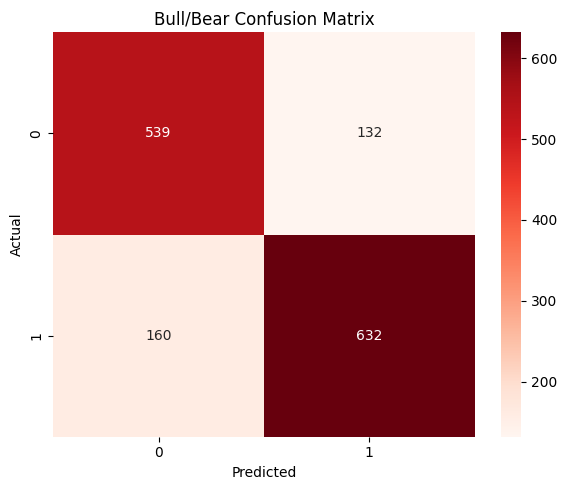


Bull/Bear Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       671
           1       0.83      0.80      0.81       792

    accuracy                           0.80      1463
   macro avg       0.80      0.80      0.80      1463
weighted avg       0.80      0.80      0.80      1463



<ipython-input-28-10b61dfee815>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_bull_bear, y=features, palette="Reds")


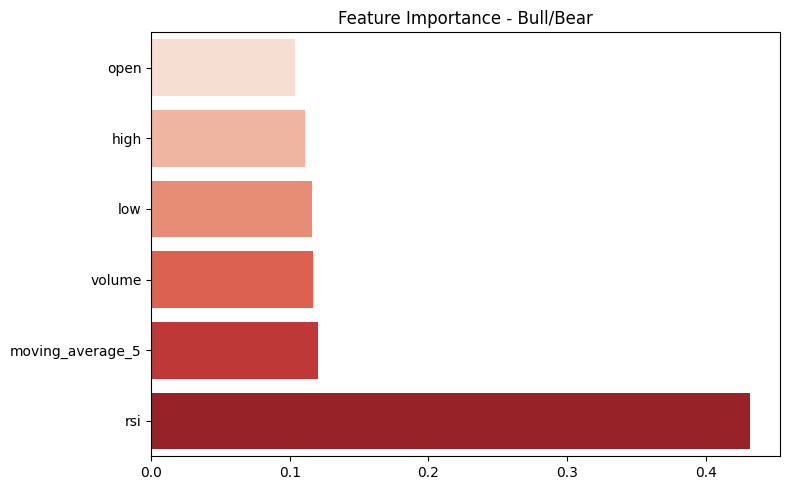

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Data
df = pd.read_csv("tata_volrem.csv")

# 📌 Create Bull/Bear Trend Labels (1 = Bullish, 0 = Bearish)
df['bull_bear'] = np.where(df['close'] > df['moving_average_10'], 1, 0)

# Select Features (X) and Target Variables (y)
features = ['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi']
X = df[features]
y_bull_bear = df['bull_bear']  # Bull/Bear Classification

# Train/Test Split
X_train, X_test, y_train_bull_bear, y_test_bull_bear = train_test_split(
    X, y_bull_bear, test_size=0.2, random_state=42)

# Train Random Forest Classifier for Bull/Bear
model_bull_bear = RandomForestClassifier(n_estimators=100, random_state=42)
model_bull_bear.fit(X_train, y_train_bull_bear)
y_pred_bull_bear = model_bull_bear.predict(X_test)

# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Components:\n", pca.components_)

# Accuracy
bull_bear_acc = accuracy_score(y_test_bull_bear, y_pred_bull_bear)
print(f"Bull/Bear Accuracy: {bull_bear_acc:.4f}")

# 📌 Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_bull_bear, y_pred_bull_bear),
            annot=True, fmt="d", cmap="Reds")
plt.title("Bull/Bear Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print("\nBull/Bear Classification Report:")
print(classification_report(y_test_bull_bear, y_pred_bull_bear))

# 📌 Feature Importance Plot
feature_importance_bull_bear = model_bull_bear.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_bull_bear, y=features, palette="Reds")
plt.title("Feature Importance - Bull/Bear")
plt.tight_layout()
plt.show()

## A2

LDA Explained Variance Ratio: [1.]
Default Model Accuracy: 0.7635

Default Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       671
           1       0.78      0.78      0.78       792

    accuracy                           0.76      1463
   macro avg       0.76      0.76      0.76      1463
weighted avg       0.76      0.76      0.76      1463

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters Found:
{'bootstrap': True, 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 58}

Optimized Model Accuracy: 0.8202

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       671
           1       0.83      0.85      0.84       792

    accuracy                           0.82      1463
   macro avg       0.82      0.82      0.82      1463
weighted avg       0.82      0.82      0.82   

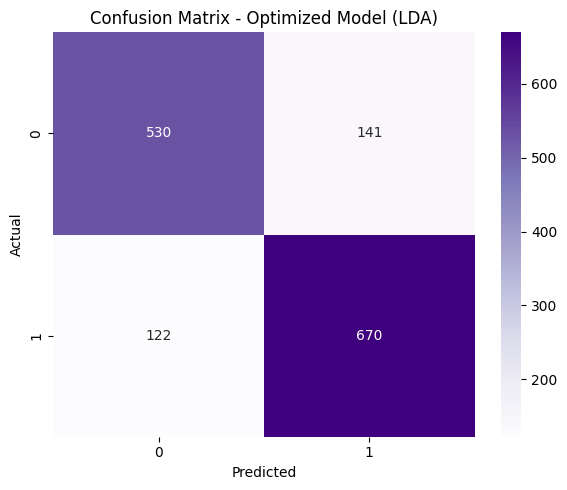

<ipython-input-10-115a80abea10>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=["LD1"], palette="Purples")


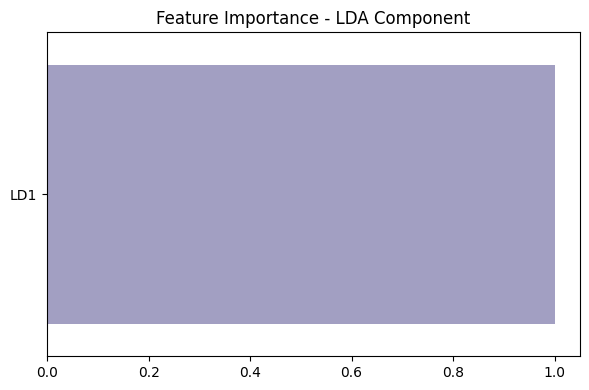

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

# Load Data
df = pd.read_csv("tata_volrem.csv")

# 📌 Create Bull/Bear Trend Labels (1 = Bullish, 0 = Bearish)
df['bull_bear'] = np.where(df['close'] > df['moving_average_10'], 1, 0)

# Select Features (X) and Target Variables (y)
features = ['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi']
X = df[features]
y = df['bull_bear']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Apply LDA
lda = LDA(n_components=1)  # Binary classification => max n_components = n_classes - 1 = 1
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("LDA Explained Variance Ratio:", lda.explained_variance_ratio_)

# 📌 Model Before Tuning
model_default = RandomForestClassifier(n_estimators=100, random_state=42)
model_default.fit(X_train_lda, y_train)
y_pred_default = model_default.predict(X_test_lda)

default_acc = accuracy_score(y_test, y_pred_default)
print(f"Default Model Accuracy: {default_acc:.4f}")
print("\nDefault Classification Report:")
print(classification_report(y_test, y_pred_default))

# 📌 Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_lda, y_train)
best_model = random_search.best_estimator_

# 📌 Model After Tuning
y_pred_optimized = best_model.predict(X_test_lda)
optimized_acc = accuracy_score(y_test, y_pred_optimized)

print("\nBest Parameters Found:")
print(random_search.best_params_)
print(f"\nOptimized Model Accuracy: {optimized_acc:.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# 📌 Compare Performance
results_df = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Before Tuning': [default_acc],
    'After Tuning': [optimized_acc]
})

print("\nModel Performance Comparison:")
print(results_df)

# 📌 Confusion Matrix for Optimized Model
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Optimized Model (LDA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 📌 Feature Importance (LDA reduces to 1D, so single component)
importances = best_model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=["LD1"], palette="Purples")
plt.title("Feature Importance - LDA Component")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the best trained model
joblib.dump(best_model, 'optimized_rf_model_bullbear_lda.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scalerbullbear.pkl')

# Save the LDA transformer
joblib.dump(lda, 'lda_transformer_bullbear.pkl')

print("✅ Model, scaler, and LDA transformer saved successfully.")

✅ Model, scaler, and LDA transformer saved successfully.


## Mini

Ensemble Model Accuracy: 0.8209

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       671
           1       0.83      0.84      0.84       792

    accuracy                           0.82      1463
   macro avg       0.82      0.82      0.82      1463
weighted avg       0.82      0.82      0.82      1463



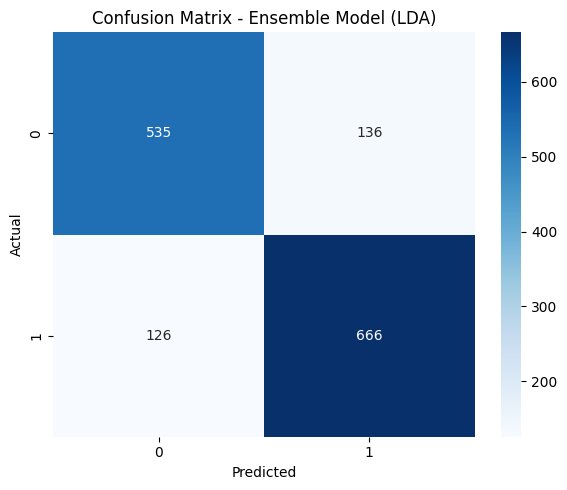

In [ ]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# 📌 Define Base Models
rf_model = RandomForestClassifier(
    n_estimators=best_model.n_estimators,
    max_depth=best_model.max_depth,
    min_samples_split=best_model.min_samples_split,
    min_samples_leaf=best_model.min_samples_leaf,
    bootstrap=best_model.bootstrap,
    random_state=42
)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

svm_model = SVC(probability=True, kernel='rbf', C=1.0, random_state=42)

# 📌 Ensemble Model: Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model), ('svm', svm_model)],
    voting='soft'  # Soft voting uses predicted probabilities for better results
)

# 📌 Train Ensemble Model
ensemble_model.fit(X_train_lda, y_train)

# 📌 Evaluate Ensemble Model
y_pred_ensemble = ensemble_model.predict(X_test_lda)
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {ensemble_acc:.4f}")
print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# 📌 Confusion Matrix for Ensemble Model
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Ensemble Model (LDA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#Buy and Sell

📈 Strategy Accuracy: 0.4970


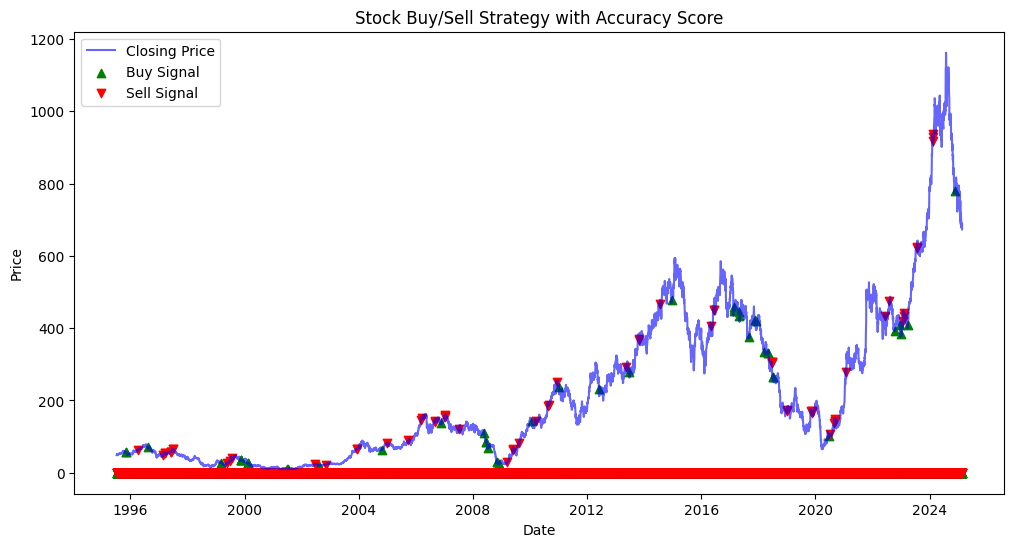

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 📌 Load Data
df = pd.read_csv("tata_volrem.csv", parse_dates=['date'])

# 📌 Define Buy/Sell Strategy
def buy_sell_strategy(data):
    buy_signals = []
    sell_signals = []

    for i in range(len(data)-1):  # Ignore last row (no future data)
        if data['rsi'][i] < 30 and data['moving_average_5'][i] > data['moving_average_10'][i]:
            buy_signals.append(1)  # Buy
            sell_signals.append(0)
        elif data['rsi'][i] > 70 and data['moving_average_5'][i] < data['moving_average_10'][i]:
            sell_signals.append(1)  # Sell
            buy_signals.append(0)
        else:
            buy_signals.append(0)
            sell_signals.append(0)

    buy_signals.append(0)  # Add placeholder for last row
    sell_signals.append(0)

    return buy_signals, sell_signals

# 📌 Apply Strategy
df['Buy_Signal'], df['Sell_Signal'] = buy_sell_strategy(df)

# 📌 Define Future Price Change (Ground Truth)
df['Future_Trend'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)  # 1 = Up, 0 = Down

# 📌 Combine Buy/Sell into One Prediction (1=Buy, -1=Sell, 0=Hold)
df['Predicted_Trend'] = df['Buy_Signal'] - df['Sell_Signal']

# 📌 Convert to Binary (Buy = 1, Sell/Hold = 0)
df['Predicted_Trend'] = df['Predicted_Trend'].apply(lambda x: 1 if x == 1 else 0)

# 📌 Accuracy Score
accuracy = accuracy_score(df['Future_Trend'], df['Predicted_Trend'])
print(f"📈 Strategy Accuracy: {accuracy:.4f}")

# 📌 Plot Buy/Sell Points
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue', alpha=0.6)
plt.scatter(df['date'], df['Buy_Signal'] * df['close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(df['date'], df['Sell_Signal'] * df['close'], label='Sell Signal', marker='v', color='red', alpha=1)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Buy/Sell Strategy with Accuracy Score")
plt.legend()
plt.show()

📊 Silhouette Score: 0.5039
pca: [[-1.77662499 -1.46525454]
 [-1.75754011 -1.04979953]
 [-1.74062472 -0.72685455]
 ...
 [ 4.72572696 -0.87592274]
 [ 4.75702617 -0.61704627]
 [ 4.71680616 -0.3713138 ]]
✔ Completeness Score: 1.0000
📌 Intercluster Distance: 2.0876
📌 Intracluster Distance: 1.6395


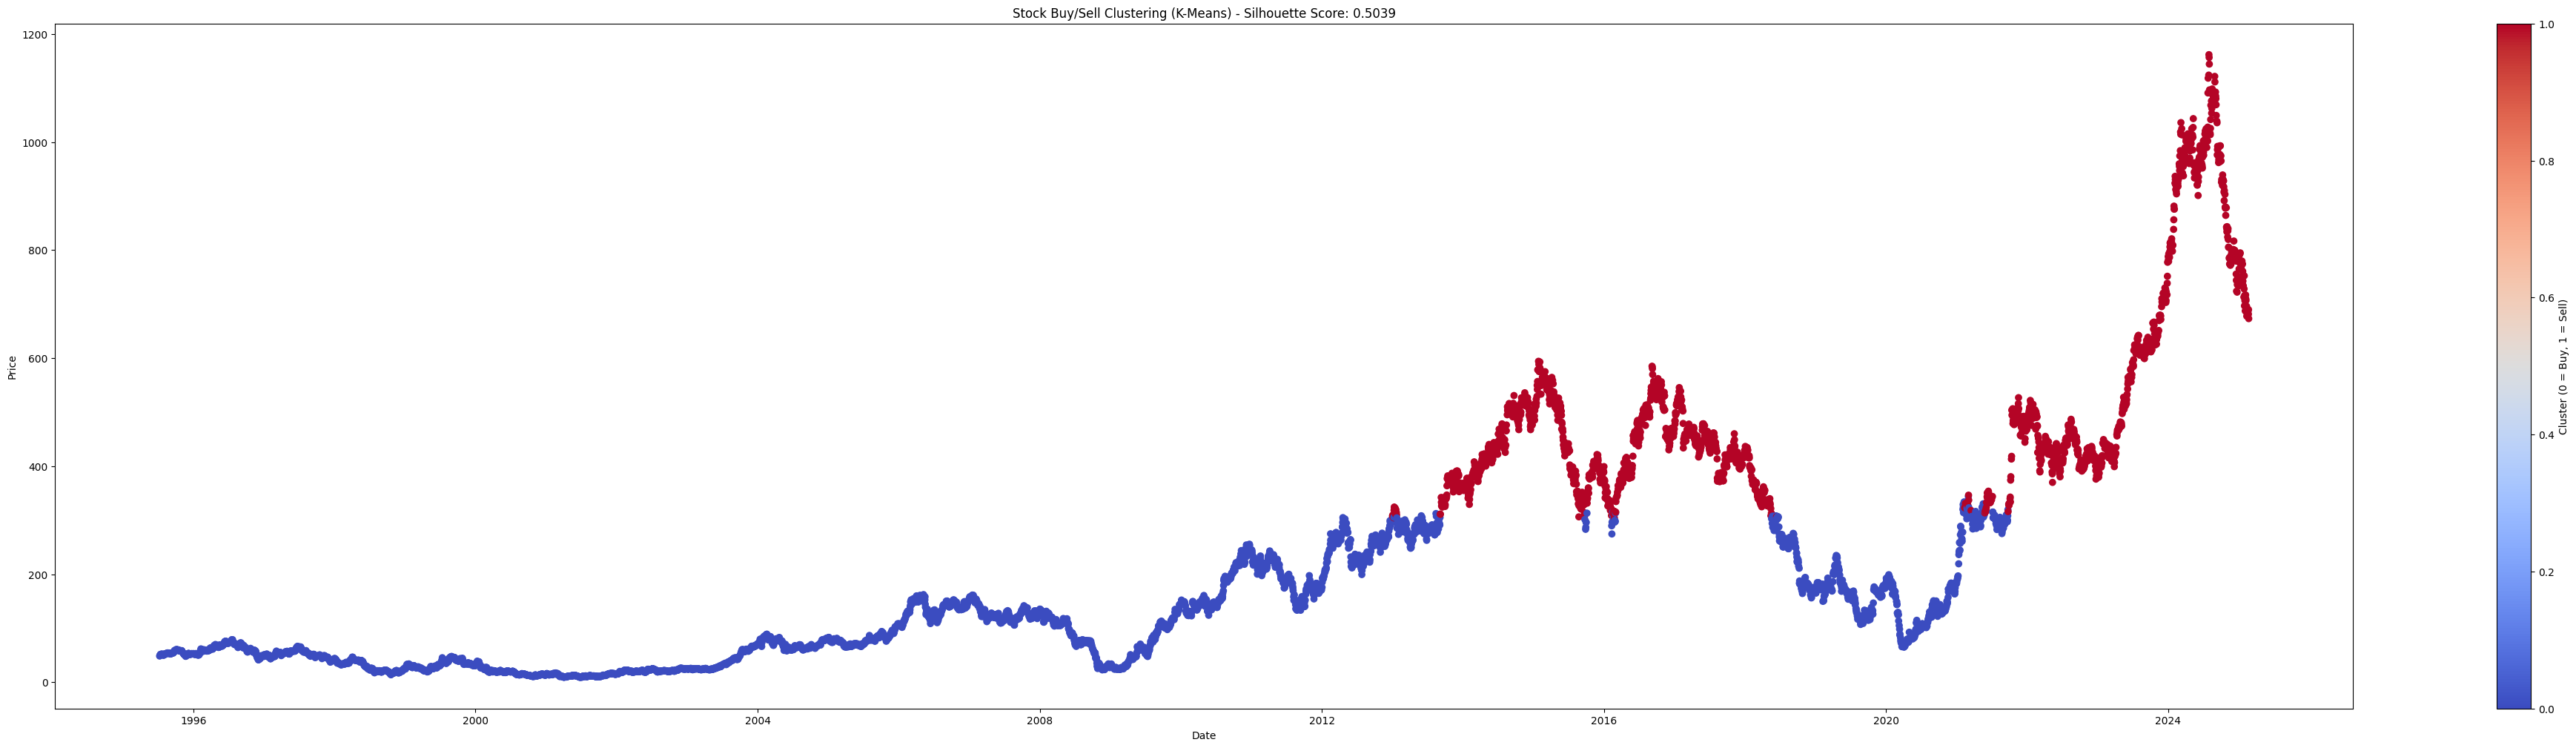

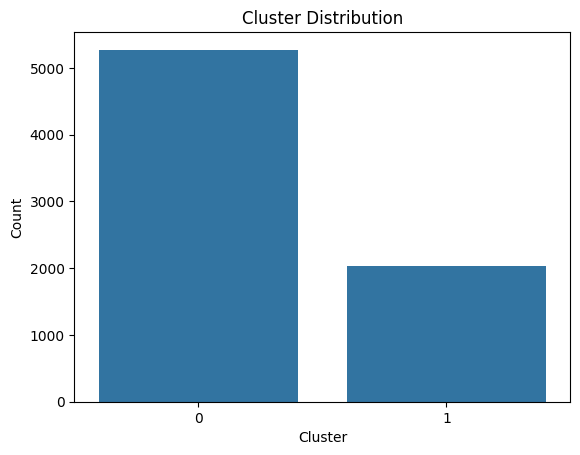

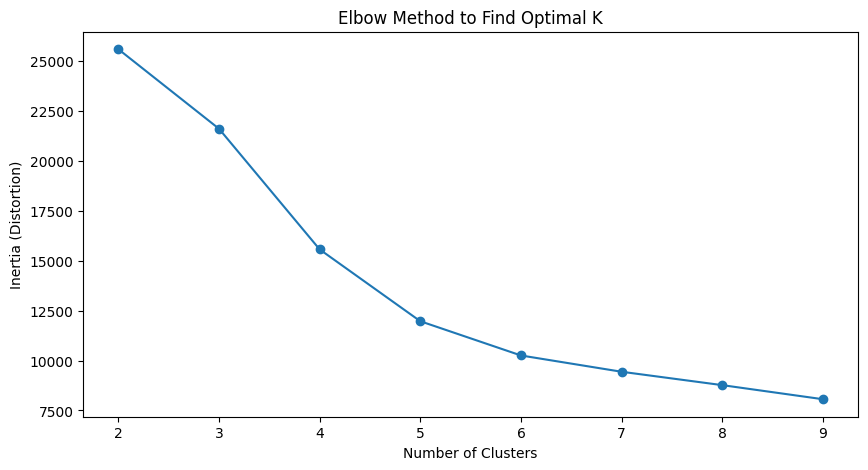

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, completeness_score
from scipy.spatial.distance import cdist

# 📌 Load Data
df = pd.read_csv("tata_volrem.csv", parse_dates=['date'])

# 📌 Select Features for Clustering
features = ['open', 'high', 'low', 'close', 'volume', 'moving_average_5', 'rsi']
X = df[features]

# 📌 Scale Data for Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Apply K-Means Clustering (2 Clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 📌 Compute Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"📊 Silhouette Score: {sil_score:.4f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("pca:",X_pca)

# 📌 Compute Completeness Score
# (Since we have no true labels, using cluster labels as a reference)
completeness = completeness_score(df['Cluster'], df['Cluster'])
print(f"✔ Completeness Score: {completeness:.4f}")

# 📌 Compute Intercluster Distance (Between Clusters)
intercluster_dist = np.mean(cdist(kmeans.cluster_centers_, kmeans.cluster_centers_, 'euclidean'))
print(f"📌 Intercluster Distance: {intercluster_dist:.4f}")

# 📌 Compute Intracluster Distance (Within Clusters)
intracluster_dist = np.mean([np.mean(cdist(X_scaled[df['Cluster'] == i], [kmeans.cluster_centers_[i]], 'euclidean')) for i in range(2)])
print(f"📌 Intracluster Distance: {intracluster_dist:.4f}")

# 📌 Plot Clusters
plt.figure(figsize=(50,12))
plt.scatter(df['date'], df['close'], c=df['Cluster'], cmap='coolwarm', label='Clusters')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Stock Buy/Sell Clustering (K-Means) - Silhouette Score: {sil_score:.4f}")
plt.colorbar(label="Cluster (0 = Buy, 1 = Sell)")
plt.show()

# 📌 Plot Cluster Distribution
sns.countplot(x=df['Cluster'])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# 📌 Elbow Method for Optimal K
distortions = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, distortions, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Distortion)")
plt.show()

## A1

pca: [[-1.7766251  -1.46525745]
 [-1.75754027 -1.04980354]
 [-1.74062486 -0.72685679]
 ...
 [ 4.72572697 -0.87592279]
 [ 4.75702617 -0.61704631]
 [ 4.71680616 -0.37131383]]
📊 Silhouette Score: 0.3134
✔ Completeness Score: 1.0000
📌 Intercluster Distance: 2.2931
📌 Intracluster Distance: 1.4211


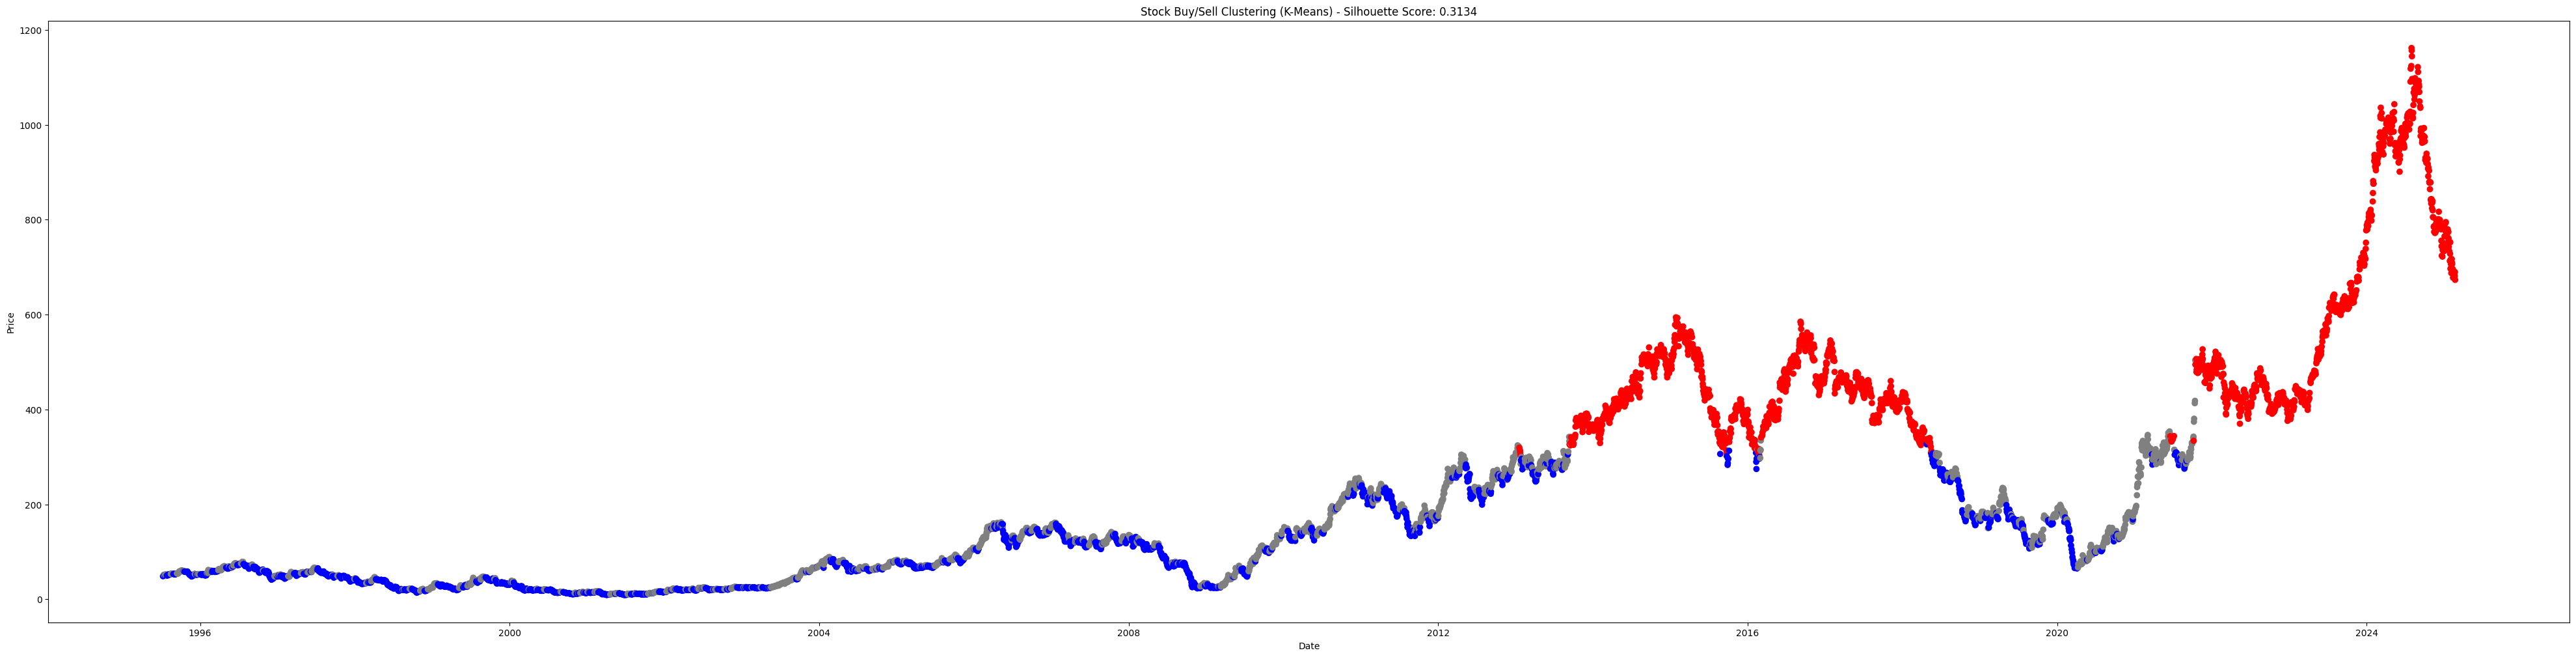

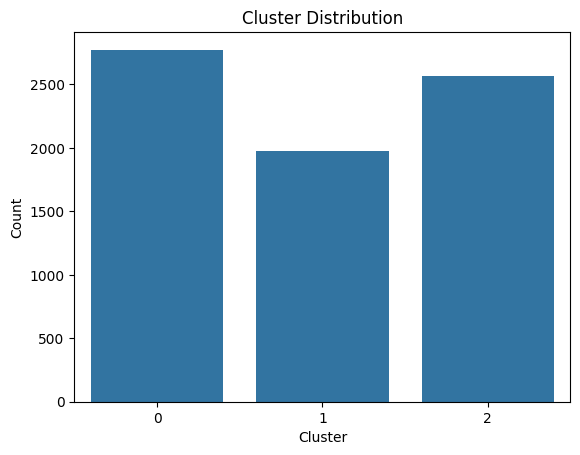

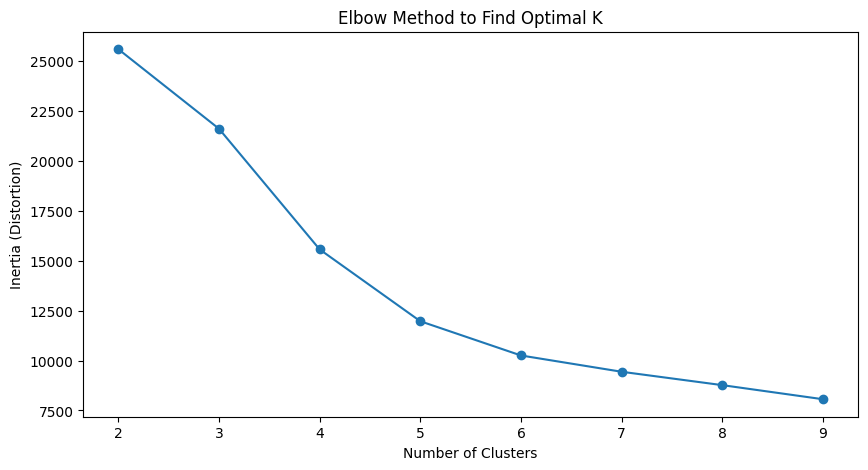

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, completeness_score
from scipy.spatial.distance import cdist

# 📌 Load Data
df = pd.read_csv("tata_volrem.csv", parse_dates=['date'])

# 📌 Select Features for Clustering
features = ['open', 'high', 'low', 'close', 'volume', 'moving_average_5', 'rsi']
X = df[features]

# 📌 Scale Data for Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Apply K-Means Clustering (2 Clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("pca:",X_pca)


# 📌 Compute Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"📊 Silhouette Score: {sil_score:.4f}")

# 📌 Compute Completeness Score
# (Since we have no true labels, using cluster labels as a reference)
completeness = completeness_score(df['Cluster'], df['Cluster'])
print(f"✔ Completeness Score: {completeness:.4f}")

# 📌 Compute Intercluster Distance (Between Clusters)
intercluster_dist = np.mean(cdist(kmeans.cluster_centers_, kmeans.cluster_centers_, 'euclidean'))
print(f"📌 Intercluster Distance: {intercluster_dist:.4f}")

# 📌 Compute Intracluster Distance (Within Clusters)
intracluster_dist = np.mean([np.mean(cdist(X_scaled[df['Cluster'] == i], [kmeans.cluster_centers_[i]], 'euclidean')) for i in range(2)])
print(f"📌 Intracluster Distance: {intracluster_dist:.4f}")

# 📌 Define Cluster Colors
cluster_colors = {0: 'blue', 1: 'red', 2: 'grey'}  # Adjust as needed

# 📌 Map Colors to Clusters
df['Color'] = df['Cluster'].map(cluster_colors)

# 📌 Plot Clusters with Custom Colors
plt.figure(figsize=(50,12))
plt.scatter(df['date'], df['close'], c=df['Color'], label='Clusters')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Stock Buy/Sell Clustering (K-Means) - Silhouette Score: {sil_score:.4f}")
plt.show()

# 📌 Plot Cluster Distribution
sns.countplot(x=df['Cluster'])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# 📌 Elbow Method for Optimal K
distortions = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, distortions, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Distortion)")
plt.show()

In [ ]:
import joblib

# 📌 Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# 📌 Save the StandardScaler
joblib.dump(scaler, 'scaler_kmeans.pkl')

# 📌 Save PCA (optional, if you're using PCA later)
joblib.dump(pca, 'pca_kmeans.pkl')

print("✅ Models saved successfully!")


✅ Models saved successfully!


## A2

PCA Explained Variance Ratio: [0.71448132 0.16178764]
📊 Initial Silhouette Score: 0.3853
📌 Initial Intercluster Distance: 2.2585
📌 Initial Intracluster Distance: 1.2238

🔧 Best Hyperparameters Found:
{'n_init': 10, 'n_clusters': 2, 'max_iter': 100, 'init': 'k-means++'}
✅ Optimized Silhouette Score: 0.5635
✅ Optimized Intercluster Distance: 2.0792
✅ Optimized Intracluster Distance: 1.4073

📊 Model Performance Comparison:
               Metric  Before Tuning  After Tuning
     Silhouette Score       0.385264      0.563480
Intercluster Distance       2.258539      2.079185
Intracluster Distance       1.223786      1.407269


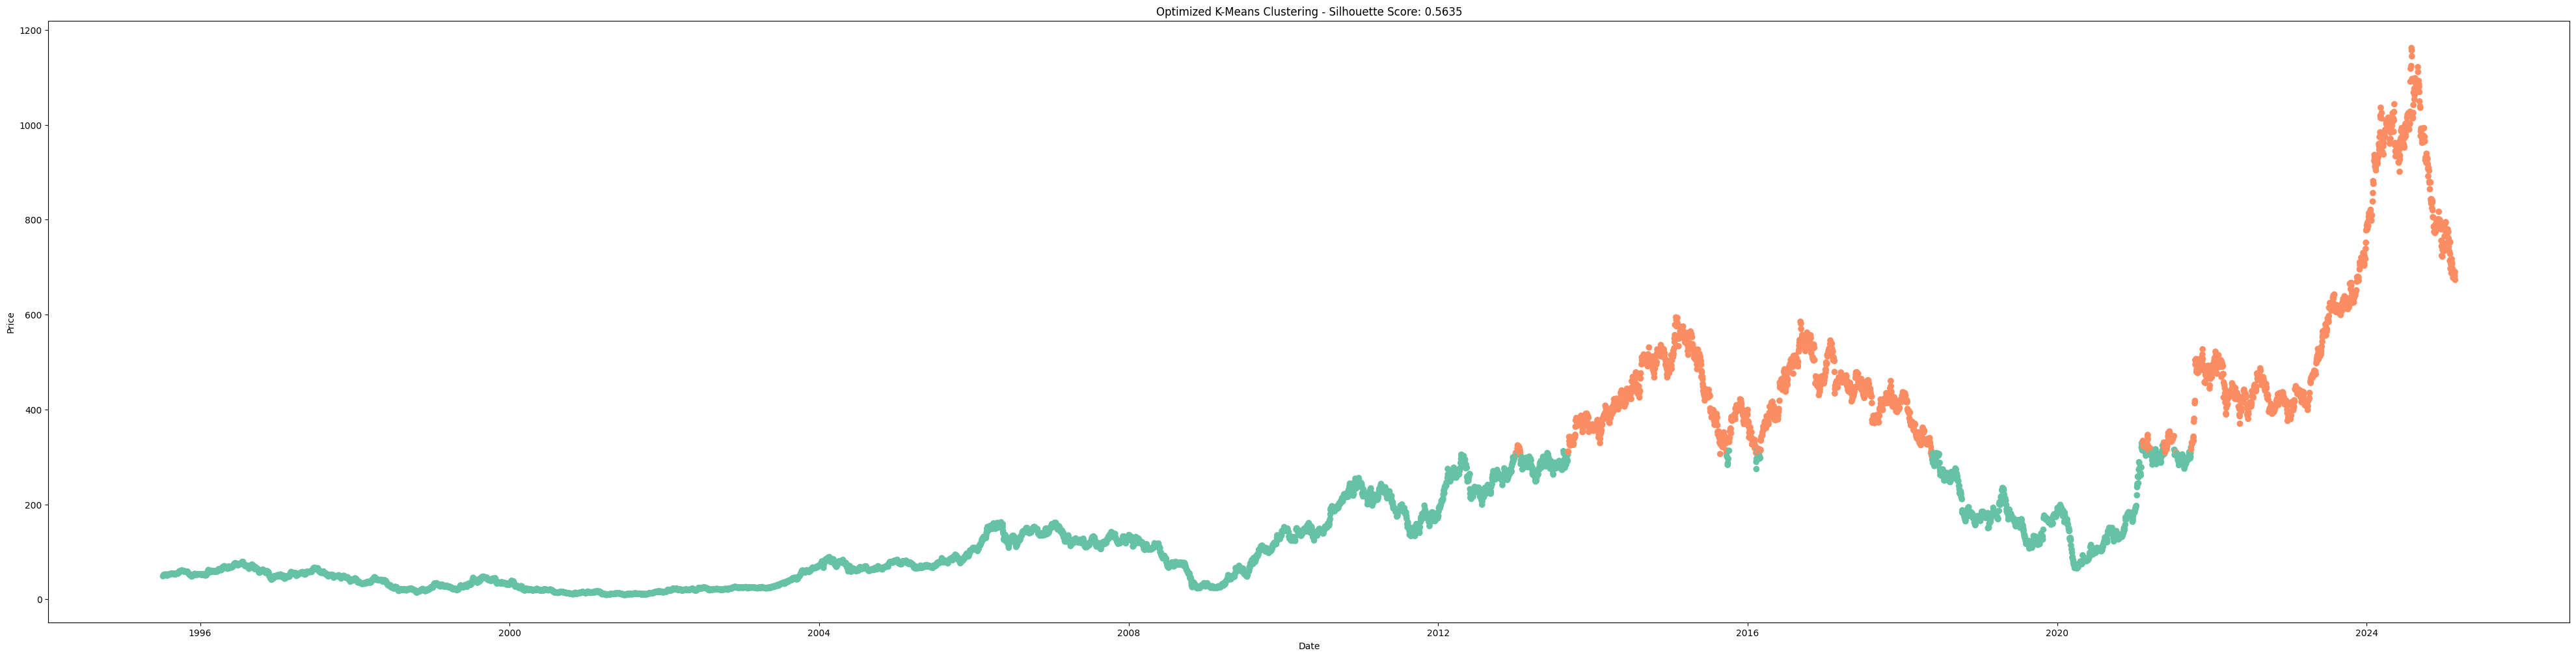

<ipython-input-14-1588b5b8664b>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Optimized_Cluster'], palette="Set2")


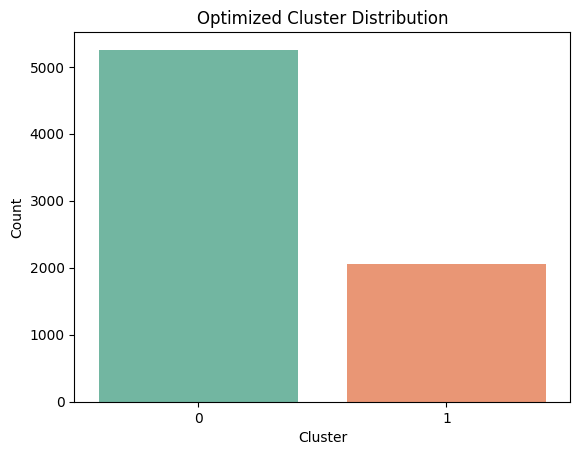

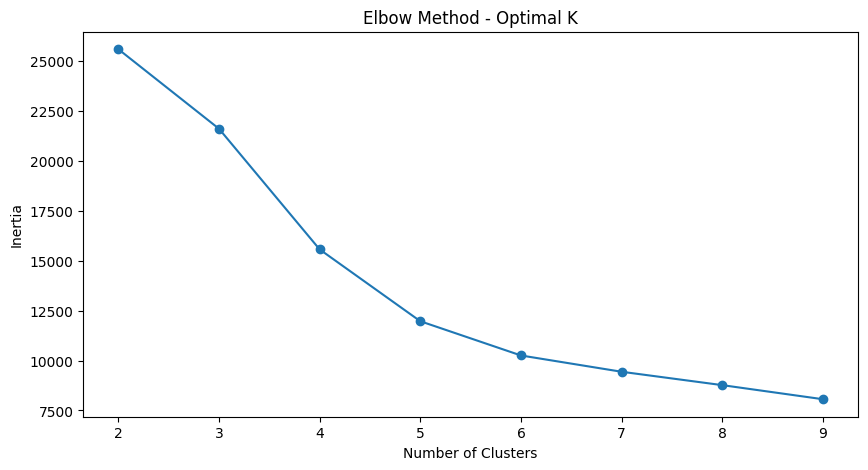

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid, ParameterSampler
from scipy.spatial.distance import cdist

# 📌 Load Data
df = pd.read_csv("tata_volrem.csv", parse_dates=['date'])

# 📌 Select Features for Clustering
features = ['open', 'high', 'low', 'close', 'volume', 'moving_average_5', 'rsi']
X = df[features]

# 📌 Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Apply PCA (Dimensionality Reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

# 📌 Initial KMeans (before tuning)
initial_kmeans = KMeans(n_clusters=3, random_state=42)
df['Initial_Cluster'] = initial_kmeans.fit_predict(X_pca)

# 📌 Performance Metrics (Before Tuning)
initial_silhouette = silhouette_score(X_pca, df['Initial_Cluster'])
initial_intercluster = np.mean(cdist(initial_kmeans.cluster_centers_, initial_kmeans.cluster_centers_, 'euclidean'))
initial_intracluster = np.mean([np.mean(cdist(X_pca[df['Initial_Cluster'] == i], [initial_kmeans.cluster_centers_[i]], 'euclidean')) for i in range(3)])

print(f"📊 Initial Silhouette Score: {initial_silhouette:.4f}")
print(f"📌 Initial Intercluster Distance: {initial_intercluster:.4f}")
print(f"📌 Initial Intracluster Distance: {initial_intracluster:.4f}")

# 📌 Define Hyperparameter Grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'n_init': [10, 20]
}

# 📌 Random Search over Grid
param_list = list(ParameterSampler(param_grid, n_iter=10, random_state=42))

best_model = None
best_score = -1
best_params = None

for params in param_list:
    model = KMeans(random_state=42, **params)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    if score > best_score:
        best_score = score
        best_model = model
        best_params = params

# 📌 Optimized Model Metrics
df['Optimized_Cluster'] = best_model.labels_
optimized_silhouette = silhouette_score(X_pca, df['Optimized_Cluster'])
optimized_intercluster = np.mean(cdist(best_model.cluster_centers_, best_model.cluster_centers_, 'euclidean'))
optimized_intracluster = np.mean([np.mean(cdist(X_pca[df['Optimized_Cluster'] == i], [best_model.cluster_centers_[i]], 'euclidean')) for i in range(best_model.n_clusters)])

print("\n🔧 Best Hyperparameters Found:")
print(best_params)
print(f"✅ Optimized Silhouette Score: {optimized_silhouette:.4f}")
print(f"✅ Optimized Intercluster Distance: {optimized_intercluster:.4f}")
print(f"✅ Optimized Intracluster Distance: {optimized_intracluster:.4f}")

# 📌 Comparison Table
comparison_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Intercluster Distance', 'Intracluster Distance'],
    'Before Tuning': [initial_silhouette, initial_intercluster, initial_intracluster],
    'After Tuning': [optimized_silhouette, optimized_intercluster, optimized_intracluster]
})
print("\n📊 Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# 📌 Define Cluster Colors for Final Plot
colors = sns.color_palette("Set2", best_model.n_clusters)
df['Color'] = df['Optimized_Cluster'].map(lambda x: colors[x])

# 📌 Plot Optimized Clusters
plt.figure(figsize=(50, 12))
plt.scatter(df['date'], df['close'], c=df['Color'], label='Clusters')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Optimized K-Means Clustering - Silhouette Score: {optimized_silhouette:.4f}")
plt.show()

# 📌 Cluster Distribution
sns.countplot(x=df['Optimized_Cluster'], palette="Set2")
plt.title("Optimized Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# 📌 Elbow Method for Visualizing Optimal K
distortions = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## Mini

Silhouette Score (Ensemble): 0.3722


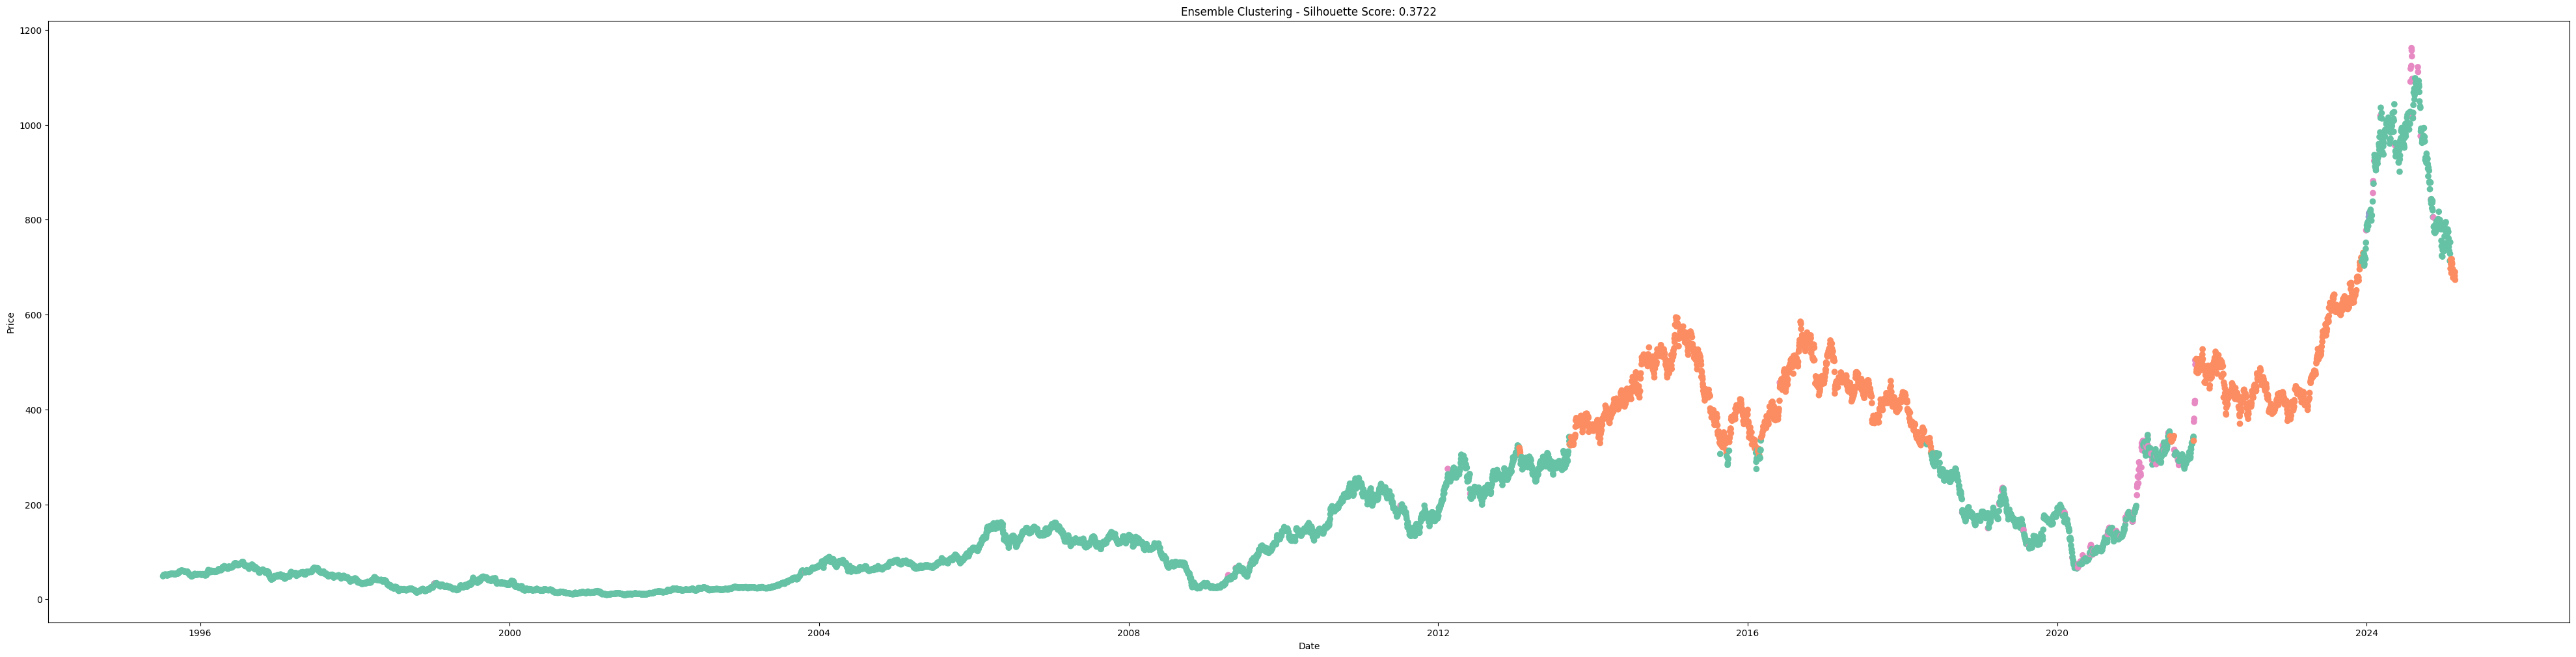

<ipython-input-16-5a38c0afe19c>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Final_Cluster'], palette="Set2")


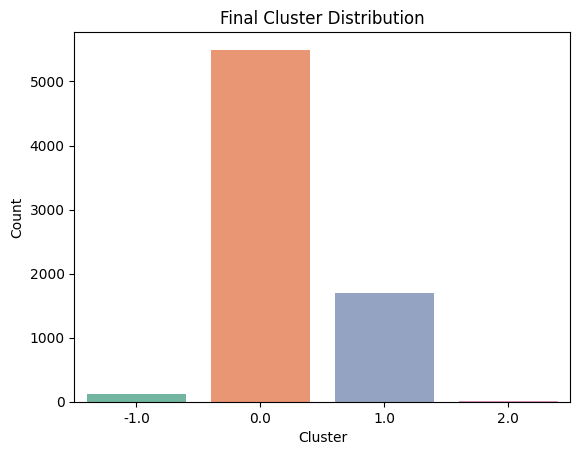

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Load Data
df = pd.read_csv("tata_volrem.csv", parse_dates=['date'])

# Select Features for Clustering
features = ['open', 'high', 'low', 'close', 'volume', 'moving_average_5', 'rsi']
X = df[features]

# Scale Data for Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (Dimensionality Reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ensemble Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit Models
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)
df['Cluster_Agglomerative'] = agglomerative.fit_predict(X_scaled)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Majority Voting for Final Clusters
df['Final_Cluster'] = df[['Cluster_KMeans', 'Cluster_Agglomerative', 'Cluster_DBSCAN']].mode(axis=1)[0]

# Compute Silhouette Score
sil_score = silhouette_score(X_scaled, df['Final_Cluster'])
print(f"Silhouette Score (Ensemble): {sil_score:.4f}")

# Define Cluster Colors
colors = sns.color_palette("Set2", len(df['Final_Cluster'].unique()))
df['Color'] = df['Final_Cluster'].map(lambda x: colors[int(x) % len(colors)])

# Plot Clusters
plt.figure(figsize=(50, 12))
plt.scatter(df['date'], df['close'], c=df['Color'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Ensemble Clustering - Silhouette Score: {sil_score:.4f}")
plt.show()

# Cluster Distribution
sns.countplot(x=df['Final_Cluster'], palette="Set2")
plt.title("Final Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Volatility

## A1


📊 Basic Random Forest Performance:
MSE: 0.010363977429136285
MAE: 0.06936750294824871
R2 Score: 0.5844805065541776


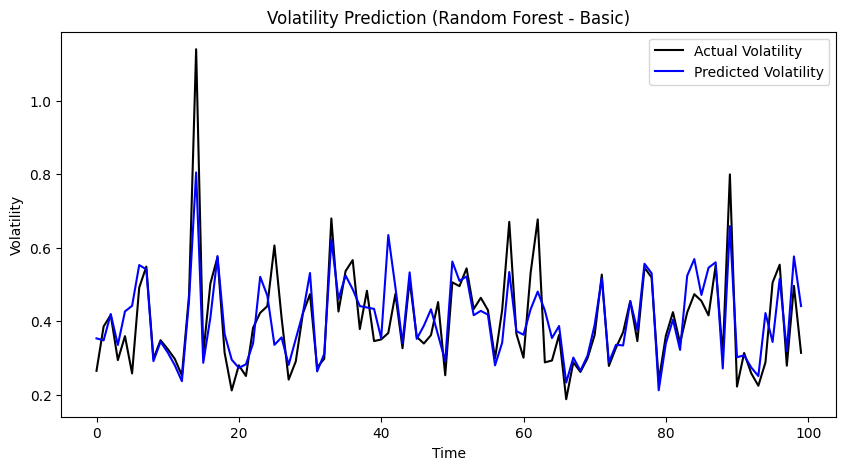

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("tata_volrem.csv", parse_dates=['date'])

# Define features and compute volatility
features = ['open', 'high', 'low', 'close', 'volume', 'moving_average_5', 'rsi']
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['volatility'] = df['log_return'].rolling(window=30).std() * np.sqrt(252)
df.dropna(inplace=True)

# Feature matrix and target variable
X = df[features]
y = df['volatility']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("\n📊 Basic Random Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual Volatility', color='black')
plt.plot(y_pred[:100], label='Predicted Volatility', color='blue')
plt.title("Volatility Prediction (Random Forest - Basic)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'volatility_random_forest_model.pkl')

# Save the scaler used for feature normalization
joblib.dump(scaler, 'volatility_scaler.pkl')

print("✅ Random Forest model and scaler saved successfully!")

✅ Random Forest model and scaler saved successfully!


## A2

PCA - Explained Variance Ratio: [0.7145219  0.1620569  0.12327059]

📊 Performance BEFORE Optimization:
MSE: 0.012707829729804325
MAE: 0.07573898915334151
R2 Score: 0.4905091131616788
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}

📊 Performance AFTER Optimization:
MSE: 0.012660963768894397
MAE: 0.07596465193515316
R2 Score: 0.49238809489925495

📋 Model Comparison Table:
      Metric  Before Optimization  After Optimization
0       MSE             0.012708            0.012661
1       MAE             0.075739            0.075965
2  R2 Score             0.490509            0.492388


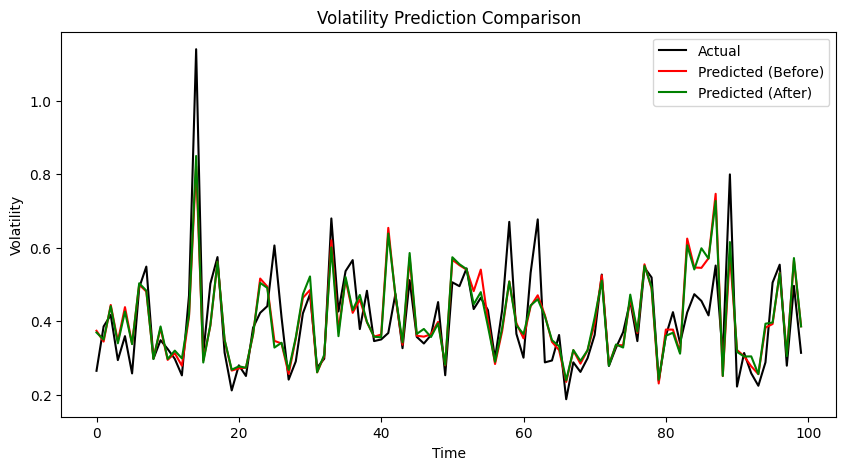

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your CSV
df = pd.read_csv("tata_volrem.csv", parse_dates=['date'])

# Define Features and Target
features = ['open', 'high', 'low', 'close', 'volume', 'moving_average_5', 'rsi']
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['volatility'] = df['log_return'].rolling(window=30).std() * np.sqrt(252)
df.dropna(inplace=True)

X = df[features]
y = df['volatility']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (Dimensionality Reduction)
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)
print(f"PCA - Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest (Default parameters)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation before tuning
print("\n📊 Performance BEFORE Optimization:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ------------------------------
# 🔍 Hyperparameter Tuning (RandomizedSearchCV)
# ------------------------------

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Best params
print("\n✅ Best Hyperparameters:", random_search.best_params_)

# ------------------------------
# 🚀 Train model with optimized params
# ------------------------------
best_rf = random_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# Evaluation after tuning
print("\n📊 Performance AFTER Optimization:")
print("MSE:", mean_squared_error(y_test, y_pred_optimized))
print("MAE:", mean_absolute_error(y_test, y_pred_optimized))
print("R2 Score:", r2_score(y_test, y_pred_optimized))

# ------------------------------
# 📊 Tabulate results
# ------------------------------
results = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R2 Score'],
    'Before Optimization': [
        mean_squared_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        r2_score(y_test, y_pred)
    ],
    'After Optimization': [
        mean_squared_error(y_test, y_pred_optimized),
        mean_absolute_error(y_test, y_pred_optimized),
        r2_score(y_test, y_pred_optimized)
    ]
})

print("\n📋 Model Comparison Table:\n", results)

# Optional: Plot
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='black')
plt.plot(y_pred[:100], label='Predicted (Before)', color='red')
plt.plot(y_pred_optimized[:100], label='Predicted (After)', color='green')
plt.title("Volatility Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()

## Mini


📊 Performance of Ensemble Model:
MSE: 0.013269206776636695
MAE: 0.08239724918587073
R2 Score: 0.46800200569151074

📋 Model Comparison Table:
     Metric  Before Optimization  After Optimization  Ensemble Model
0       MSE             0.012708            0.012661        0.013269
1       MAE             0.075739            0.075965        0.082397
2  R2 Score             0.490509            0.492388        0.468002


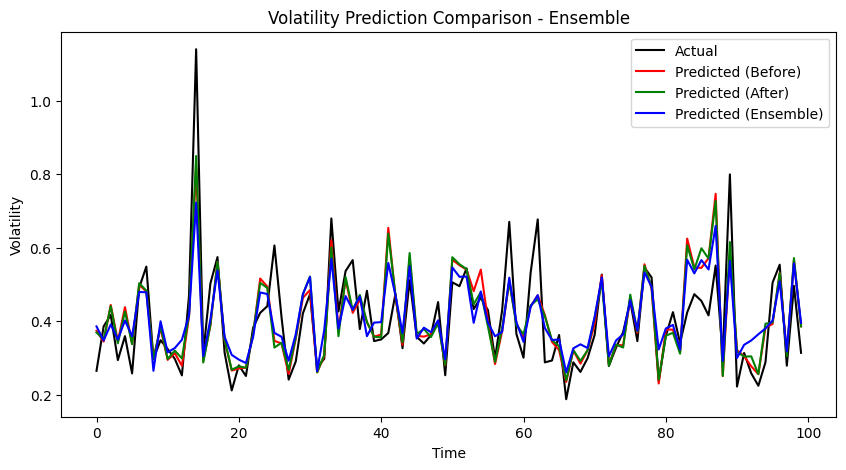

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor

# 📌 Define Base Models
rf_model = RandomForestRegressor(n_estimators=best_rf.n_estimators,
                                 max_depth=best_rf.max_depth,
                                 min_samples_split=best_rf.min_samples_split,
                                 min_samples_leaf=best_rf.min_samples_leaf,
                                 random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

et_model = ExtraTreesRegressor(n_estimators=200, max_depth=5, random_state=42)

# 📌 Define Ensemble Model (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('gb', gb_model), ('et', et_model)])

# 📌 Train Ensemble Model
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# 📊 Evaluate Ensemble Model
print("\n📊 Performance of Ensemble Model:")
print("MSE:", mean_squared_error(y_test, y_pred_ensemble))
print("MAE:", mean_absolute_error(y_test, y_pred_ensemble))
print("R2 Score:", r2_score(y_test, y_pred_ensemble))

# 📊 Tabulate results
results['Ensemble Model'] = [
    mean_squared_error(y_test, y_pred_ensemble),
    mean_absolute_error(y_test, y_pred_ensemble),
    r2_score(y_test, y_pred_ensemble)
]

print("\n📋 Model Comparison Table:")
print(results)

# 📌 Plot Comparison
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='black')
plt.plot(y_pred[:100], label='Predicted (Before)', color='red')
plt.plot(y_pred_optimized[:100], label='Predicted (After)', color='green')
plt.plot(y_pred_ensemble[:100], label='Predicted (Ensemble)', color='blue')
plt.title("Volatility Prediction Comparison - Ensemble")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [ ]:
xgboost
adaboost
litegbm

Train R² Score: 1.0000
Test R² Score: 0.9997
Train Accuracy (±2% threshold): 0.9930
Test Accuracy (±2% threshold): 0.8483


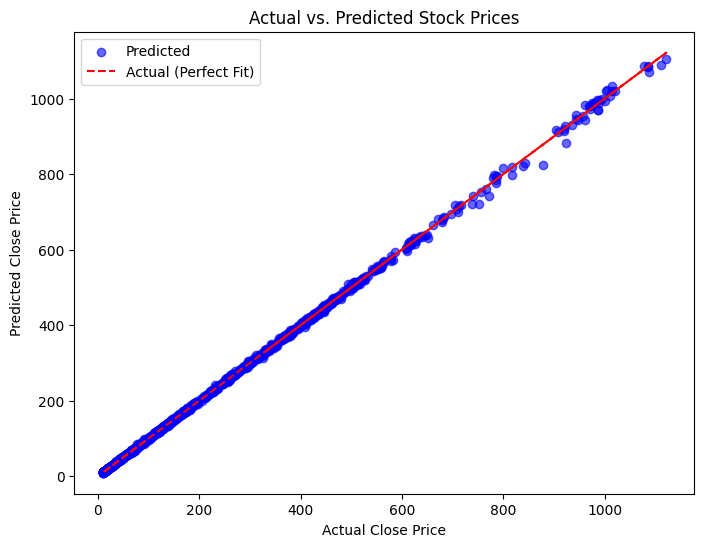

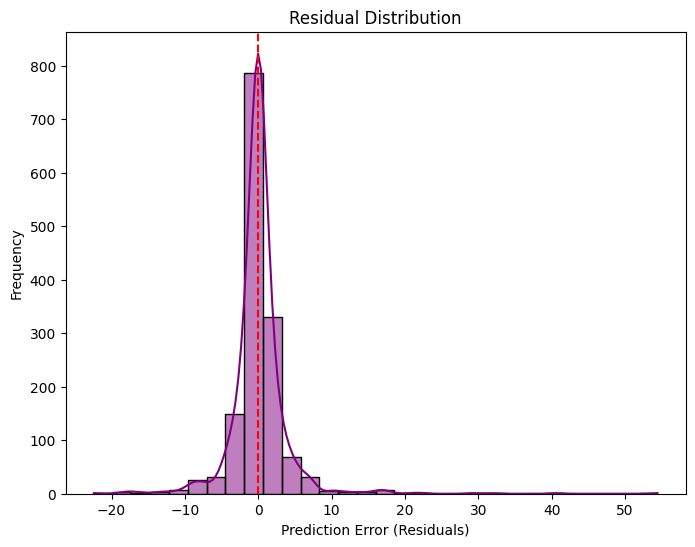

<ipython-input-19-04147884bbe0>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette="viridis")


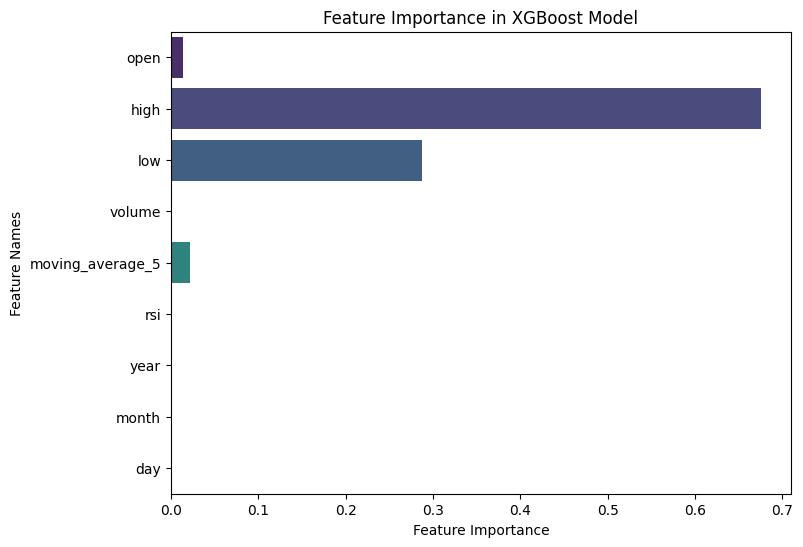

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load Data
df = pd.read_csv("tata_volrem.csv")

# Convert 'date' column to datetime and extract features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Select Features (X) and Target Variable (y)
X = df[['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi', 'year', 'month', 'day']]
y = df['close']  # Predicting the closing price

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict on Train & Test Data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² Score (Normalized Accuracy)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Define Custom Accuracy (Within 2% of True Value)
def custom_accuracy(y_true, y_pred, tolerance=0.02):
    return np.mean(np.abs((y_true - y_pred) / y_true) <= tolerance)

train_acc = custom_accuracy(y_train, y_train_pred)
test_acc = custom_accuracy(y_test, y_test_pred)

print(f"Train Accuracy (±2% threshold): {train_acc:.4f}")
print(f"Test Accuracy (±2% threshold): {test_acc:.4f}")

# 📈 1. Actual vs. Predicted Prices (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue", label="Predicted")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Actual (Perfect Fit)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()

# 📊 2. Residual Plot (Error Analysis)
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# 📉 3. Feature Importance Plot
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in XGBoost Model")
plt.show()

Average Test R² Score (Ensemble): 1.0000
Average Test Accuracy (±2% threshold, Ensemble): 0.9679


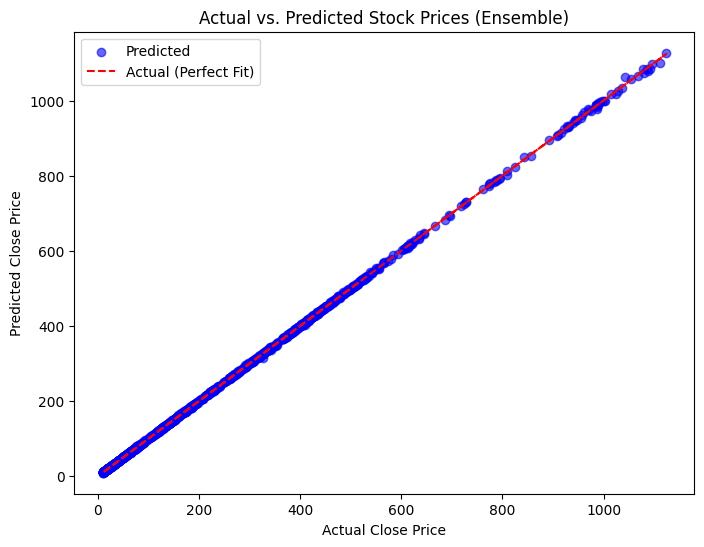

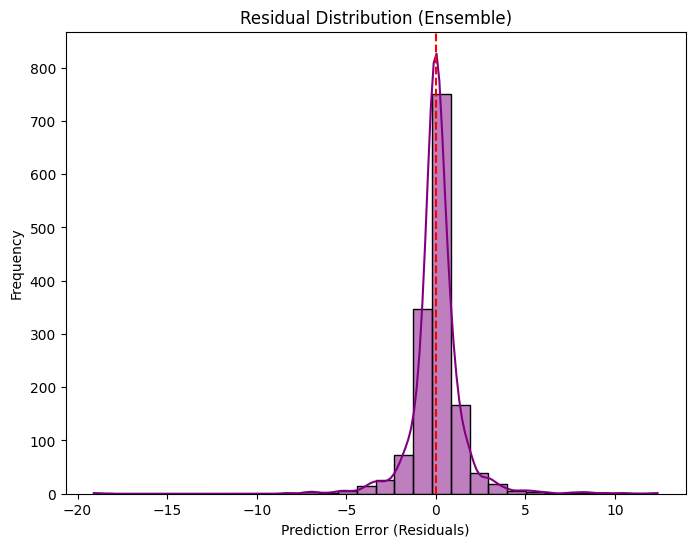

<ipython-input-21-a5f6211796c6>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_feature_importance, y=X.columns, palette="viridis")


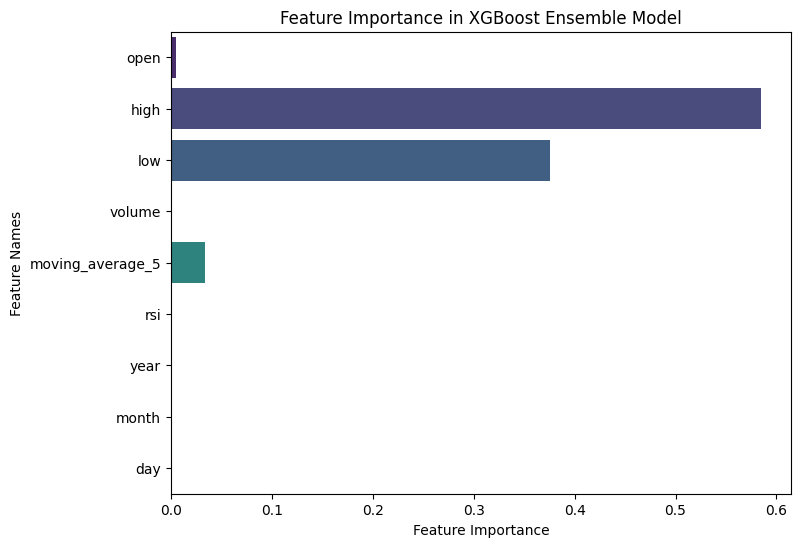

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load Data
df = pd.read_csv("tata_volrem.csv")

# Convert 'date' column to datetime and extract features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Select Features (X) and Target Variable (y)
X = df[['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi', 'year', 'month', 'day']]
y = df['close']  # Predicting the closing price

# Initialize multiple XGBoost models for ensemble
num_models = 5
models = []
train_r2_scores = []
test_r2_scores = []
train_accuracies = []
test_accuracies = []

for i in range(num_models):
    # Split data differently for each model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i * 42)

    # Train XGBoost Regressor
    model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.2, random_state=i * 42)
    model.fit(X_train, y_train)

    # Store the model
    models.append(model)

    # Predict on Train & Test Data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² Score (Normalized Accuracy)
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))

    # Define Custom Accuracy (Within 2% of True Value)
    def custom_accuracy(y_true, y_pred, tolerance=0.02):
        return np.mean(np.abs((y_true - y_pred) / y_true) <= tolerance)

    train_accuracies.append(custom_accuracy(y_train, y_train_pred))
    test_accuracies.append(custom_accuracy(y_test, y_test_pred))

# Average Ensemble Predictions
def ensemble_predict(X_input):
    predictions = np.mean([model.predict(X_input) for model in models], axis=0)
    return predictions

# Final Predictions on Test Data
y_test_pred_ensemble = ensemble_predict(X_test)

test_r2_ensemble = r2_score(y_test, y_test_pred_ensemble)
test_acc_ensemble = custom_accuracy(y_test, y_test_pred_ensemble)

print(f"Average Test R² Score (Ensemble): {test_r2_ensemble:.4f}")
print(f"Average Test Accuracy (±2% threshold, Ensemble): {test_acc_ensemble:.4f}")

# 📈 1. Actual vs. Predicted Prices (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_ensemble, alpha=0.6, color="blue", label="Predicted")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Actual (Perfect Fit)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Stock Prices (Ensemble)")
plt.legend()
plt.show()

# 📊 2. Residual Plot (Error Analysis)
residuals = y_test - y_test_pred_ensemble
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Ensemble)")
plt.show()

# 📉 3. Feature Importance Plot (Averaged over Models)
avg_feature_importance = np.mean([model.feature_importances_ for model in models], axis=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in XGBoost Ensemble Model")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1607
[LightGBM] [Info] Number of data points in the train set: 5849, number of used features: 9
[LightGBM] [Info] Start training from score 216.144554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1607
[LightGBM] [Info] Number of data points in the train set: 5849, number of used features: 9
[LightGBM] [Info] Start training from score 219.050044
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1607
[LightGBM] [Info] Number of data points in the train set

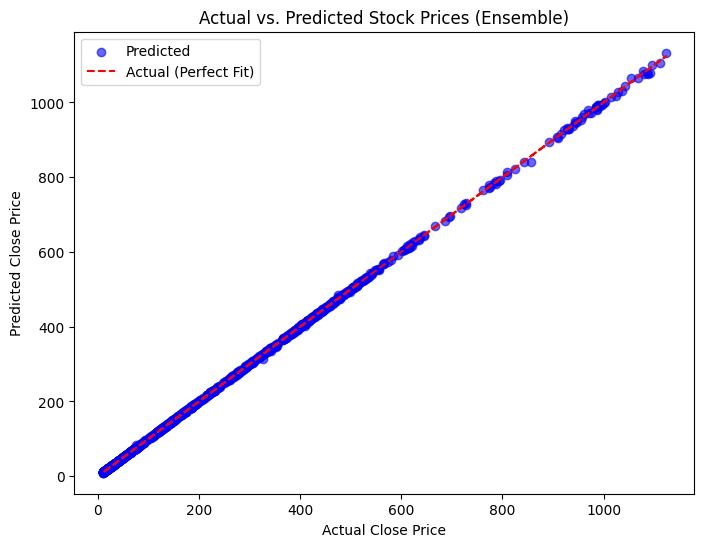

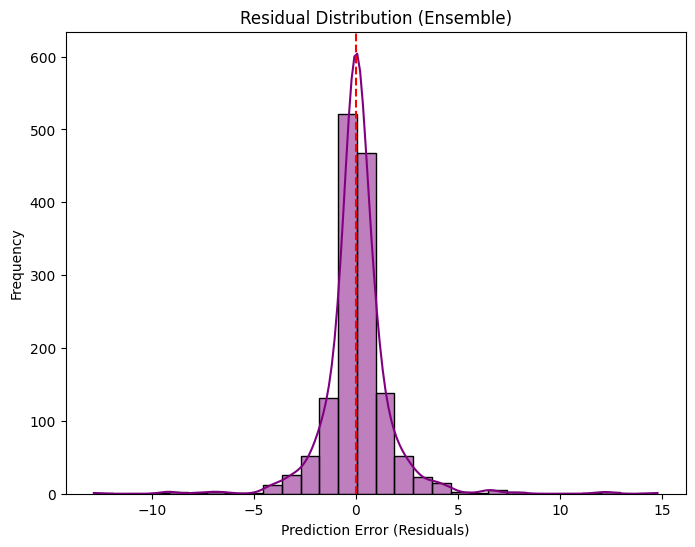

<ipython-input-23-a68cf24547ce>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_feature_importance, y=X.columns, palette="viridis")


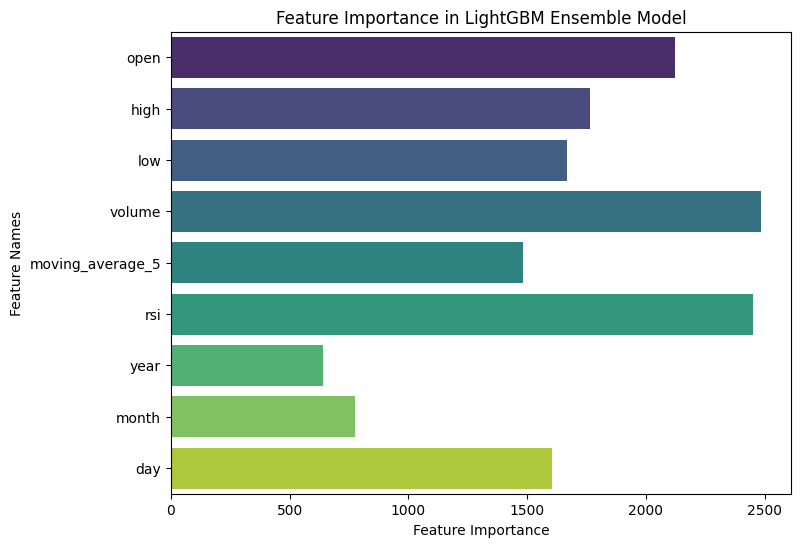

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load Data
df = pd.read_csv("tata_volrem.csv")

# Convert 'date' column to datetime and extract features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Select Features (X) and Target Variable (y)
X = df[['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi', 'year', 'month', 'day']]
y = df['close']  # Predicting the closing price

# Initialize multiple LightGBM models for ensemble
num_models = 5
models = []
train_r2_scores = []
test_r2_scores = []
train_accuracies = []
test_accuracies = []

for i in range(num_models):
    # Split data differently for each model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i * 42)

    # Train LightGBM Regressor
    model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.2, random_state=i * 42)
    model.fit(X_train, y_train)

    # Store the model
    models.append(model)

    # Predict on Train & Test Data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² Score (Normalized Accuracy)
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))

    # Define Custom Accuracy (Within 2% of True Value)
    def custom_accuracy(y_true, y_pred, tolerance=0.02):
        return np.mean(np.abs((y_true - y_pred) / y_true) <= tolerance)

    train_accuracies.append(custom_accuracy(y_train, y_train_pred))
    test_accuracies.append(custom_accuracy(y_test, y_test_pred))

# Average Ensemble Predictions
def ensemble_predict(X_input):
    predictions = np.mean([model.predict(X_input) for model in models], axis=0)
    return predictions

# Final Predictions on Test Data
y_test_pred_ensemble = ensemble_predict(X_test)

test_r2_ensemble = r2_score(y_test, y_test_pred_ensemble)
test_acc_ensemble = custom_accuracy(y_test, y_test_pred_ensemble)

print(f"Average Test R² Score (Ensemble): {test_r2_ensemble:.4f}")
print(f"Average Test Accuracy (±2% threshold, Ensemble): {test_acc_ensemble:.4f}")

# 📈 1. Actual vs. Predicted Prices (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_ensemble, alpha=0.6, color="blue", label="Predicted")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Actual (Perfect Fit)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Stock Prices (Ensemble)")
plt.legend()
plt.show()

# 📊 2. Residual Plot (Error Analysis)
residuals = y_test - y_test_pred_ensemble
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Ensemble)")
plt.show()

# 📉 3. Feature Importance Plot (Averaged over Models)
avg_feature_importance = np.mean([model.feature_importances_ for model in models], axis=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in LightGBM Ensemble Model")
plt.show()


Average Test R² Score (Ensemble): 0.9991
Average Test Accuracy (±2% threshold, Ensemble): 0.4176


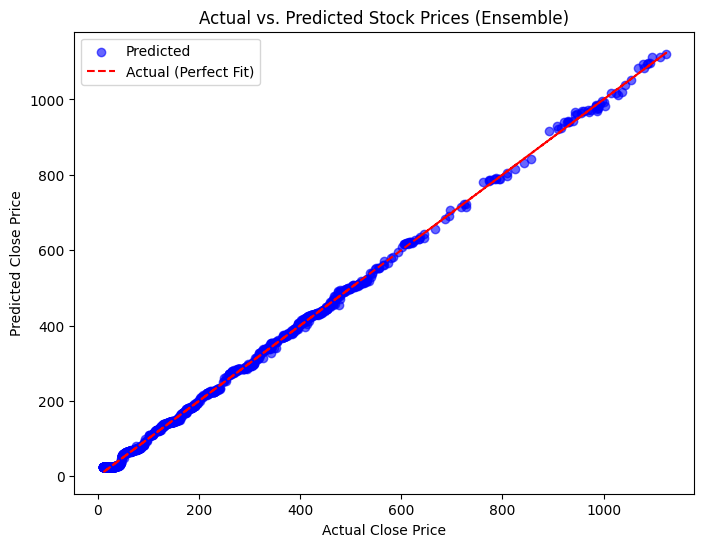

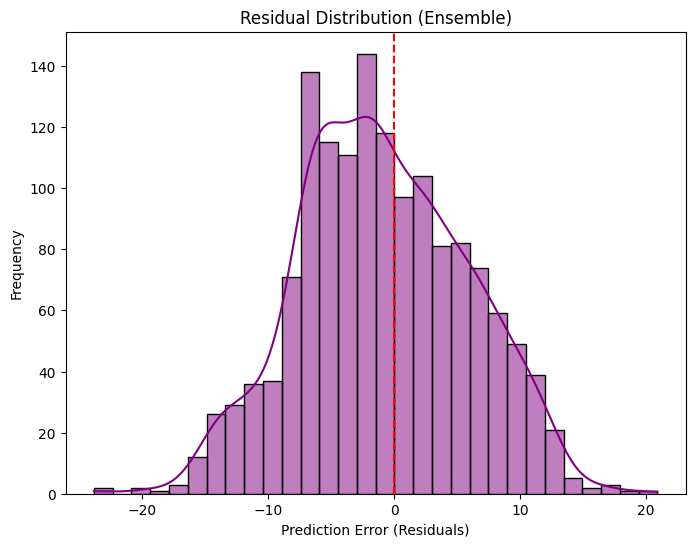

<ipython-input-25-bc722bd59a44>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_feature_importance, y=X.columns, palette="viridis")


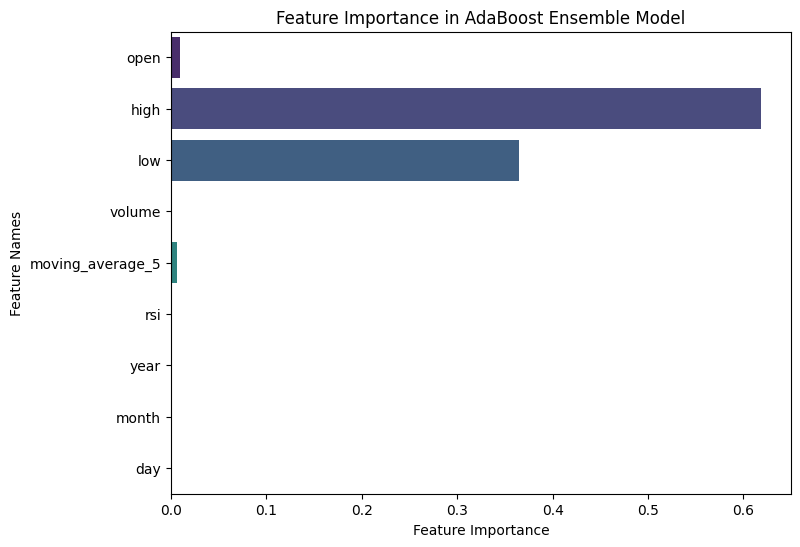

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load Data
df = pd.read_csv("tata_volrem.csv")

# Convert 'date' column to datetime and extract features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Select Features (X) and Target Variable (y)
X = df[['open', 'high', 'low', 'volume', 'moving_average_5', 'rsi', 'year', 'month', 'day']]
y = df['close']  # Predicting the closing price

# Initialize multiple AdaBoost models for ensemble
num_models = 5
models = []
train_r2_scores = []
test_r2_scores = []
train_accuracies = []
test_accuracies = []

for i in range(num_models):
    # Split data differently for each model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i * 42)

    # Train AdaBoost Regressor
    base_model = DecisionTreeRegressor(max_depth=4, random_state=i * 42)
    model = AdaBoostRegressor(estimator=base_model, n_estimators=100, learning_rate=0.1, random_state=i * 42)
    model.fit(X_train, y_train)

    # Store the model
    models.append(model)

    # Predict on Train & Test Data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² Score (Normalized Accuracy)
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))

    # Define Custom Accuracy (Within 2% of True Value)
    def custom_accuracy(y_true, y_pred, tolerance=0.02):
        return np.mean(np.abs((y_true - y_pred) / y_true) <= tolerance)

    train_accuracies.append(custom_accuracy(y_train, y_train_pred))
    test_accuracies.append(custom_accuracy(y_test, y_test_pred))

# Average Ensemble Predictions
def ensemble_predict(X_input):
    predictions = np.mean([model.predict(X_input) for model in models], axis=0)
    return predictions

# Final Predictions on Test Data
y_test_pred_ensemble = ensemble_predict(X_test)

test_r2_ensemble = r2_score(y_test, y_test_pred_ensemble)
test_acc_ensemble = custom_accuracy(y_test, y_test_pred_ensemble)

print(f"Average Test R² Score (Ensemble): {test_r2_ensemble:.4f}")
print(f"Average Test Accuracy (±2% threshold, Ensemble): {test_acc_ensemble:.4f}")

# 📈 1. Actual vs. Predicted Prices (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_ensemble, alpha=0.6, color="blue", label="Predicted")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Actual (Perfect Fit)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Stock Prices (Ensemble)")
plt.legend()
plt.show()

# 📊 2. Residual Plot (Error Analysis)
residuals = y_test - y_test_pred_ensemble
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Ensemble)")
plt.show()

# 📉 3. Feature Importance Plot (Averaged over Models)
avg_feature_importance = np.mean([model.feature_importances_ for model in models], axis=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in AdaBoost Ensemble Model")
plt.show()